<a href="https://colab.research.google.com/github/FeralLanguidWoman/CSC-306-Projects/blob/main/Jessie_Davidson_CSC_306_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# THE FINAL PROJECT!!!!

## Step one: duplicate this notebook and set the sharing settings to COMMENT!

#### For part 1 of this project, we will analyze and plot data to tell the story of Covid-19 within the US, first at the level of states (California and New York), and then at the level of counties (your county!). You will find instructions for each part below.

##Name:

Team members: Jessie Davidson

**Please also add your name above** to the name of the colab **(e.g. YOURNAME_CSC_306_Final_Project.ipynb)** Thank you!

## Loading modules

In [ ]:
# Loading modules - see the help page on Canvas to see which modules you should load and how!!!
# Pseudocode:
  # import pandas for data analysis
  # import matplotlib.pyplot for data visualization/graphing
  # import datetime to format/manipulate date and time values
  # import numpy for mathmatical functions
  # import seaborn to improve appearence of matplotlib.pyplot data visualization (in this case primarily by color)
  # import linregress from scipy.stats allows you to perform a linear regression on two sets of data


import pandas as pd # for data analysis
                    # imported as "pd" so I don't have to write out "pandas", everytime I use something from the library)

import matplotlib.pyplot as plt # for data visualization
                                # imported as "plt" so I don't have to write out "matplotlib.pyplot", everytime I use something from the library)

import datetime as dt # for date/time value manipulation
                      # imported as "dt" so I don't have to write out "datetime", everytime I use something from the module)

import numpy as np # for use of mathmatical functions
                   # imported as "np" so I don't have to write out "numpy", everytime I use something from the package)

import seaborn as sb # to improve appearence of matplotlib.pyplot data visualizations
                     # imported as "sb" so I don't have to write out "seaborn", everytime I use something from the package)

from scipy.stats import linregress as lr # to perform statistical functions, in this case specifically a linear regression on two sets of data.
                                         # imported as "lr" so I don't have to write out "lineregress" everytime I call the linregress function from the scipy.stats package


In [ ]:
# Pseudocode:
  # use seaborn to select the colors you want to use for graphs
    # assign tha selection to a variable
    # call the variable to see the color choice

colors = sb.color_palette('colorblind') # use the sb.color_palette function to assign a color palette to the variable "colors"
                                        # after looking at some of the options I decided on the palette "colorblind"
colors # calling the variable "colors," should display the "colorblind" palette

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

## Loading data

In [ ]:
# loading data (filled in for you!):

# From Our World in Data
world_vax = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv', parse_dates=['date'])
us_vax = world_vax[world_vax['location']=='United States']
state_vax = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/us_state_vaccinations.csv', parse_dates=['date'])

# From the LA Times
county_vax = pd.read_csv('https://raw.githubusercontent.com/datadesk/california-coronavirus-data/master/cdph-vaccination-county-totals.csv', parse_dates=['date'])

# From the New York Times
us_data = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us.csv', parse_dates=['date'])
state_data = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us-states.csv', parse_dates=['date'])
county_data_2020 = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us-counties-2020.csv', parse_dates=["date"])
county_data_2021 = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us-counties-2021.csv', parse_dates=["date"])
county_data_2022 = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us-counties-2022.csv', parse_dates=["date"])
county_data_2023 = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us-counties-2023.csv', parse_dates=["date"])
county_data = pd.concat([county_data_2020, county_data_2021, county_data_2022, county_data_2023]) # making one big file for county data


##**Part 1**

## 1a) Plotting state data
*  Use `state_data.head(3)` to take a peek at the rolling average data for US states.
* Using this data, plot the number of **deaths per 100 thousand** people due to Covid-19 over time in New York and California. Plot both New York and California on the same plot, in different colors (see screenshots with plotting tips on the help page)
    * Before plotting each state, you will need to make a new dataframe that is the subset of the state data that only contains entries for that state (see filtering/subsetting tips on the help page)       
    * Include a legend     
    * Label the y-axis
    * Try to make your plot look nice!

In [ ]:
# Pseudeocode:

  # use the fuction ".head" from the pandas library to make sure the the dataset assigned to the variable state_data is loaded/visible/correct
    # this data is from the New York Times

  # create a function to filter out specific states from the state_data dataset
    # I'm calling this function "filter_state", and giving it the parameter "state"
      # add a docstring to describe the function
      # "data" equals state_data indexed to include only the data of the state entered into the function
      # return the variable "data"

  # call the "filter_state" function
    # call the function with "California" as the parameter, set it equal to the variable "ca_data"
      # use .head to see the first 3 rows of the "ca_data" dataset
    # call the function with "New York" as the parameter, set it equal to the variable "ny_data"
      # use .head to see the first 3 rows of the "ny_data" dataset

  # create a plot with matplotlib.pyplot to show the progression of covid deaths over time in New York and California
    # fig, sub equals plt.subplot, then include general plot information in paranthesis, such as number of plots/subplots, size of figure, dpi (dots per inch), and if the figures share an x-axis
    # use plt.plot to graph the "date" collum as the independent variable, and "deaths_avg_per_100k" as the dependent variable for "ca_data"
      # within the paranthesis, include independent variable (x), dependent variable (y), the color you want the data to be visualized as, and a label
    # use plt.plot to graph the "date" collum as the independent variable, and "deaths_avg_per_100k" as the dependent variable for "ny_data"
      # within the paranthesis, include independent variable (x), dependent variable (y), the color you want the data to be visualized as, and a label
    # set a label for the x-axis, in this case "date"
    # set a label for the y-axis, in this case "deaths per 100k"
    # add a title to the graph
    # make a legend to help the people who will read the graph distingush the data
    # use sb.despine to remove the borders of the plot


In [ ]:
state_data.head(3)  # uses .head from pandas to show the first 3 rows of the dataset

,date,geoid,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
0,2020-01-21,USA-53,Washington,1,0.14,0.0,0,0.0,0.0
1,2020-01-22,USA-53,Washington,0,0.14,0.0,0,0.0,0.0
2,2020-01-23,USA-53,Washington,0,0.14,0.0,0,0.0,0.0


In [ ]:
def filter_state(state):                                            # creates the function "filter_state" with the parameter "state"
  '''to filter specific states out of the "state_data" dataset'''   # docstring describing the function
  data = state_data[state_data['state'] == state ]                  # indexes the state_data to only include data from the state entered into the function, assigned to the variable "data"
  return data                                                       # returns the variable "data"

In [ ]:
ca_data = filter_state('California')   # calls the filter_state function with "California" inputed for the state parameter
                                       # assigned to the variable ca_data

ca_data.head(3)                        # uses .head from pandas to show the first 3 rows of the dataset

,date,geoid,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
7,2020-01-25,USA-06,California,1,0.14,0.0,0,0.0,0.0
10,2020-01-26,USA-06,California,1,0.29,0.0,0,0.0,0.0
14,2020-01-27,USA-06,California,0,0.29,0.0,0,0.0,0.0


In [ ]:
ny_data = filter_state('New York')    #calls the filter_state function with "New York" inputed for the state parameter
                                      # assigned to the variable ny_data

ny_data.head(3)                       # uses .head from pandas to show the first 3 rows of the dataset

,date,geoid,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
246,2020-03-01,USA-36,New York,1,0.14,0.0,0,0.0,0.0
259,2020-03-02,USA-36,New York,0,0.14,0.0,0,0.0,0.0
275,2020-03-03,USA-36,New York,1,0.29,0.0,0,0.0,0.0


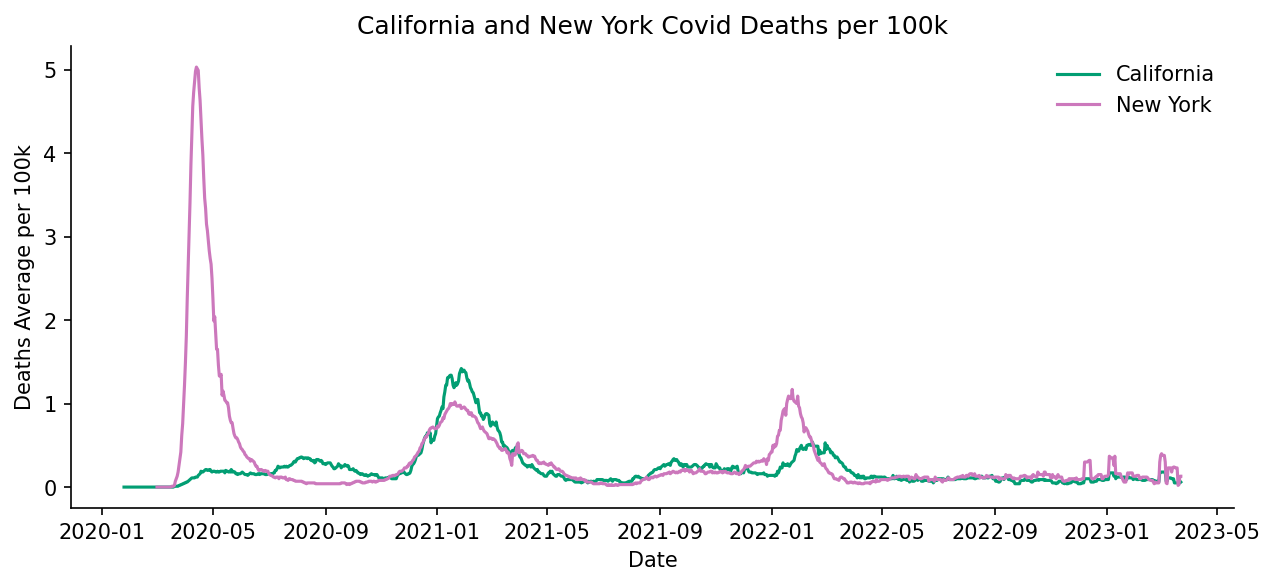

In [ ]:
fig, sub = plt.subplots(1, 1, figsize = (10, 4), dpi = 150, sharex=True)                          # creates a plot to visualize the CA and NY data
                                                                                                    # 1 plot
                                                                                                    # the figure size is 10 by 4
                                                                                                    # 150 dots per inch
                                                                                                    # one x-axis

plt.plot(ca_data['date'], ca_data['deaths_avg_per_100k'], color=colors[2], label= "California")   # plots ca_data
                                                                                                    # independent variable (x) is "date"
                                                                                                    # dependent variable (y) is "deaths_avg_per_100k"
                                                                                                    # the color is 2 from the seaborn palette colorblind
                                                                                                    # labeled as "California"
plt.plot(ny_data['date'], ny_data['deaths_avg_per_100k'], color=colors[4], label= "New York")     # plots ny_data
                                                                                                    # independent variable (x) is "date"
                                                                                                    # dependent variable (y) is "deaths_avg_per_100k"
                                                                                                    # the color is 4 from the seaborn palette colorblind
                                                                                                    # labeled as "New York"
sub.set_ylabel('Deaths Average per 100k')                                                         # adds label to y-axis
sub.set_xlabel('Date')                                                                            # adds labe to x-axis
sub.set_title('California and New York Covid Deaths per 100k')                                    # adds title to graph
sub.legend(frameon=False)                                                                         # adds a legend to show which line is CA and which is NY
                                                                                                    # no frame around the legend
sb.despine()                                                                                      # no border around the graph




## 1b) Measuring R at three time intervals in New York and California:
* March 14 - April 1st, 2020
* November 20th - December 20th, 2020
* February 1st - March 1st, 2021

1. Make a new column called `day_index` in the `state_data` dataframe for the day number (an integer) by subtracting the datetime for the start of 2020 and then using .dt.days on the result (see help page for a walkthrough on this part)
2. Make a new column called `log_deaths` in the `state_data` dataframe for log(deaths) by using `np.log` on the deaths_ave column
3. Write a function that:
    * Filters the dataframe based on the state and a time range (start date and end date)
    * Does a linear regression to find the exponential growth rate r (regress your day number column (x) against log deaths (y), r is the slope)
    * Returns an estimate of R, where R is equal to the exponentiation of the exponential growth rate r multiplied by the generation time, which we'll estimate as 5 days.  
$R=e^{5r}$
(`R=np.exp(5*r)`)
4.	Call your function for each of the 3 timeframes in each of the two states
    * Optionally you can also plot log_deaths against day_index in your function in order to graphically see the trends, and see whether these periods have a roughly linear change in log_deaths over time.


In [ ]:
# will need 6 R values total:
  # 3 for california
  # 3 for new york

# Pseudocode:
  # add a collum "day_index" to the state_data dataset
    # the data in this collum will be state_data indexed by "date" minus dt.datetime(2020, 1, 1).dt.days
  # add a collum "log_deaths" to the state_data dataset
    # the data in this collum will be found by using np.log on state_data index by "deaths_avg"
  # use state_data.head to make sure the collums were added to the dataset
  # create a function to find R betweem two dates for a particular state
    # define the function as "R_value", the parameters will be "state," "start_date," "end_date"
    # add a docstring to expalin the function
    # call the function I made in part 1a, "filter_state" to filter the out the data for state inputed, set it equal to the variable st_data
    # set the variable st_time equal to st_data indexed by st_data index by "date" is greater than or equal to the inputed "start_date" and st_data index by "date" is less than than or equal to the inputed "end_date"
    # set the variable lr1 equal to the function lr with "st_time['day_index'], and st_time[log_deaths] as the inputs for the two sets of data needed for the function parameters
    # set r equal to lr1 indexed to show the "0" (first) result, which is the rvalue
    # set R equal to np.exp(5*r)
    # return R
  # Call the function R_value 3 times for each state once for each of the dates listed in the part 1b instructions
  # R should be found 6 times, 3 for CA, 3 for NY


In [ ]:
state_data['day_index'] = (state_data['date'] - dt.datetime(2020, 1, 1)).dt.days    # adds "day_index" collum to state_data

In [ ]:
state_data['log_deaths'] = np.log(state_data['deaths_avg'])   # adds "log_deaths" collum to state_data

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
state_data.head(3)  # uses .head from pandas to show the first 3 rows of the dataset

,date,geoid,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,day_index,log_deaths
0,2020-01-21,USA-53,Washington,1,0.14,0.0,0,0.0,0.0,20,-inf
1,2020-01-22,USA-53,Washington,0,0.14,0.0,0,0.0,0.0,21,-inf
2,2020-01-23,USA-53,Washington,0,0.14,0.0,0,0.0,0.0,22,-inf


In [ ]:
def R_value(state, start_date, end_date):                                                   # creates function "R_value" to find R
                                                                                              # parameters are state, start_date, end_date
  '''to find R between 2 dates for a particular state'''                                    # docsting to explain function
  st_data = filter_state(state)                                                             # filters out data for state inputed for "state" parameter s
                                                                                              # sets it equal to the variable st_data
  st_time = st_data[(st_data['date'] >= (start_date)) & (st_data['date'] <= (end_date))]    # indexs st_data so R is found for time between the start_date and end_date
                                                                                              # sets it equal to the variable st_time
  lr1 = lr(st_time['day_index'], st_time['log_deaths'])                                     # takes a linear regression of st_time["day_index"] and st_time["log_deaths"]
                                                                                              # sets it equal to the variable 1r1
  r = lr1[0]                                                                                # indexes lr1 to show the "0" (first) term of the results of the linear regression
                                                                                              # sets lr[0] equal to the variable r
  R = np.exp(5*r)                                                                           # find R using np.exp(5 times the variable r)
                                                                                              # sets it equal to the variable R
  return R                                                                                  # returns the variable R

In [ ]:
caR1 = R_value('California', dt.datetime(2020,3,14), dt.datetime(2020,4,1))       # calls R_value function for California, and the dates 3/14/2020 through 4/1/2020
                                                                                  # assigned to the variable caR1

print(caR1)                                                                       # prints caR1 variable

2.810597802083794


In [ ]:
caR2 = R_value('California', dt.datetime(2020,11,20), dt.datetime(2020,12,20))    # calls R_value function for California, and the dates 11/20/2020 through 12/20/2020
                                                                                  # assigned to the variable caR2

print(caR2)                                                                       # prints caR2 variable

1.2930863356846372


In [ ]:
caR3 = R_value('California', dt.datetime(2021,2,1), dt.datetime(2021,3,1))        # calls R_value function for California, and the dates 2/1/2021 through 3/1/2021
                                                                                  # assigned to the variable caR3

print(caR3)                                                                       # prints caR3 variable

0.9009879243869238


In [ ]:
nyR1 = R_value('New York', dt.datetime(2020,3,14), dt.datetime(2020,4,1))         # calls R_value function for New York, and the dates 3/14/2020 through 4/1/2020
                                                                                  # assigned to the variable nyR1

print(nyR1)                                                                       # prints nyR1 variable

8.02561907248394


In [ ]:
nyR2 = R_value('New York', dt.datetime(2020,11,20), dt.datetime(2020,12,20))      # calls R_value function for New York, and the dates 11/20/2020 through 12/20/2020
                                                                                  # assigned to the variable nyR2

print(nyR2)                                                                       # prints nyR2 variable

1.2392934214696347


In [ ]:
nyR3 = R_value('New York', dt.datetime(2021,2,1), dt.datetime(2021,3,1))          # calls R_value function for New York, and the dates 2/1/2021 through 3/1/2021
                                                                                  # assigned to the variable nyR3

print(nyR3)                                                                       # prints nyR3 variable

0.9125593295798026


## 1c) Telling the story of coronavirus in your county
Make a plot like the one at the top of these instruction document, but for your county instead of the whole country
* take a look at the county data by running `county_data.head(3)`
* Make a subset of that dataframe that is only data for California
* Make a subset of that dataframe that is only data for your county
* Make a figure with 3 subplots using this line of code: `fig, subs = plt.subplots(3, 1, figsize=(8, 4), dpi=150, sharex=True)`
* Plot cases_avg and deaths_avg (these are rolling averages) over time on two subplots of the figure
* Use “sharex=True” when making your subplots to make the x-axis the same between plots
* Using the `county_vax` data from the LA Times:
    * Make a subset of that dataframe that is only data for your county
    * Plot fully_vaccinated_percent over time on a third subplot of your figure
    * Label your axes where appropriate


In [ ]:
# Pseudocode:
  # Begin by filetring the county data by state
    # ca_county_data variable is assigned to county_data indexed by county_data['state'] which equals "California"
  # Use .head to check ca_county_data

  # Then filter ca_county_data by county
    # I will be looking at my home county of Santa Clara
    # the variable sc_data is assigned to ca_county_data indexed by ca_county_data['county'] which equals "Santa Clara"
  # Use .head to check sc_data

  # then filter county_vax
    # assign the variable sc_vax to county_vax["county"] equals "Santa Clara"
  # Use .head to check sc_vax

  # Using matplotlib.pyplot, plot the cases average, deaths average, and fully vaccinated percent, over time on one figure with 3 subplots:
    # fig, sub equals plt.subplots, then include general plot information in paranthesis, such as number of plots/subplots, size of figure, dpi (dots per inch), and if the figures share an x-axis
    # use sub[0].plot to plot the cases average from the sc_data, with "date" as the independent variable (x),  and "cases_avg" as the dependent variable (y)
    # use sub[1].plot to plot the deaths average from the sc_data, with "date" as the independent variable (x),  and "deaths_avg" as the dependent variable (y)
    # use sub[2].plot to plot the fully vaccinated percentage from the sc_vax, with "date" as the independent variable (x),  and "fully_vaccinated_percent" as the dependent variable (y)
    # set the x-label as "date"
    # set the y-label for the cases average plot as "Average Cases"
    # set the y-label for the deaths average plot as "Average Deaths"
    # set the y-label for the percent fully vaccinated plot as "% Fully Vaccinated"
    # set the title for the cases average plot as "Average Cases Over Time in Santa Clara County"
    # set the title for the cases average plot as "Average Deaths Over Time in Santa Clara County"
    # set the title for the cases average plot as "% Fully Vaccinated Over Time in Santa Clara County"

In [ ]:
ca_county_data = county_data[county_data['state'] == 'California'] # separates just the the California Counties out of the New York Times county_data
                                                                   # assigned it to the variable ca_county_data

In [ ]:
ca_county_data.head(3) # using .head to check ca_county_data

,date,geoid,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
7,2020-01-25,USA-06059,Orange,California,1,0.14,0.0,0,0.0,0.0
10,2020-01-26,USA-06059,Orange,California,0,0.14,0.0,0,0.0,0.0
11,2020-01-26,USA-06037,Los Angeles,California,1,0.14,0.0,0,0.0,0.0


In [ ]:
sc_data = ca_county_data[ca_county_data['county'] == 'Santa Clara'] # separates the data from Santa Clara County out of the ca_county_data
                                                                    # assigned it to the variable sc_data

In [ ]:
sc_data.head(3)  # using .head to check sc_data

,date,geoid,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
35,2020-01-31,USA-06085,Santa Clara,California,1,0.14,0.01,0,0.0,0.0
42,2020-02-01,USA-06085,Santa Clara,California,0,0.14,0.01,0,0.0,0.0
49,2020-02-02,USA-06085,Santa Clara,California,1,0.29,0.01,0,0.0,0.0


In [ ]:
sc_vax = county_vax[county_vax['county'] == 'Santa Clara'] # separated out vaccination data for Santa Clara County from the LA Times county_vax data
                                                           # assigned it to the variable sc_vax

In [ ]:
sc_vax.head(3) # using .head to check sc_vax data

,date,county,fips,population,doses_administered,new_doses_administered,pfizer_doses,new_pfizer_doses,moderna_doses,new_moderna_doses,...,new_jj_doses,partially_vaccinated,new_partially_vaccinated,at_least_one_dose,new_at_least_one_dose,fully_vaccinated,new_fully_vaccinated,partially_vaccinated_percent,at_least_one_dose_percent,fully_vaccinated_percent
42,2023-06-03,Santa Clara,85,1922200.0,5503687,164,3572519.0,84,1739707.0,78,...,0,148215.0,10,1837551.0,10,1689283.0,3,0.077107,0.955962,0.878828
100,2023-06-02,Santa Clara,85,1922200.0,5503523,918,3572435.0,561,1739629.0,356,...,0,148208.0,86,1837541.0,86,1689280.0,15,0.077103,0.955957,0.878826
158,2023-06-01,Santa Clara,85,1922200.0,5502605,830,3571874.0,523,1739273.0,305,...,0,148137.0,68,1837455.0,68,1689265.0,9,0.077066,0.955912,0.878819


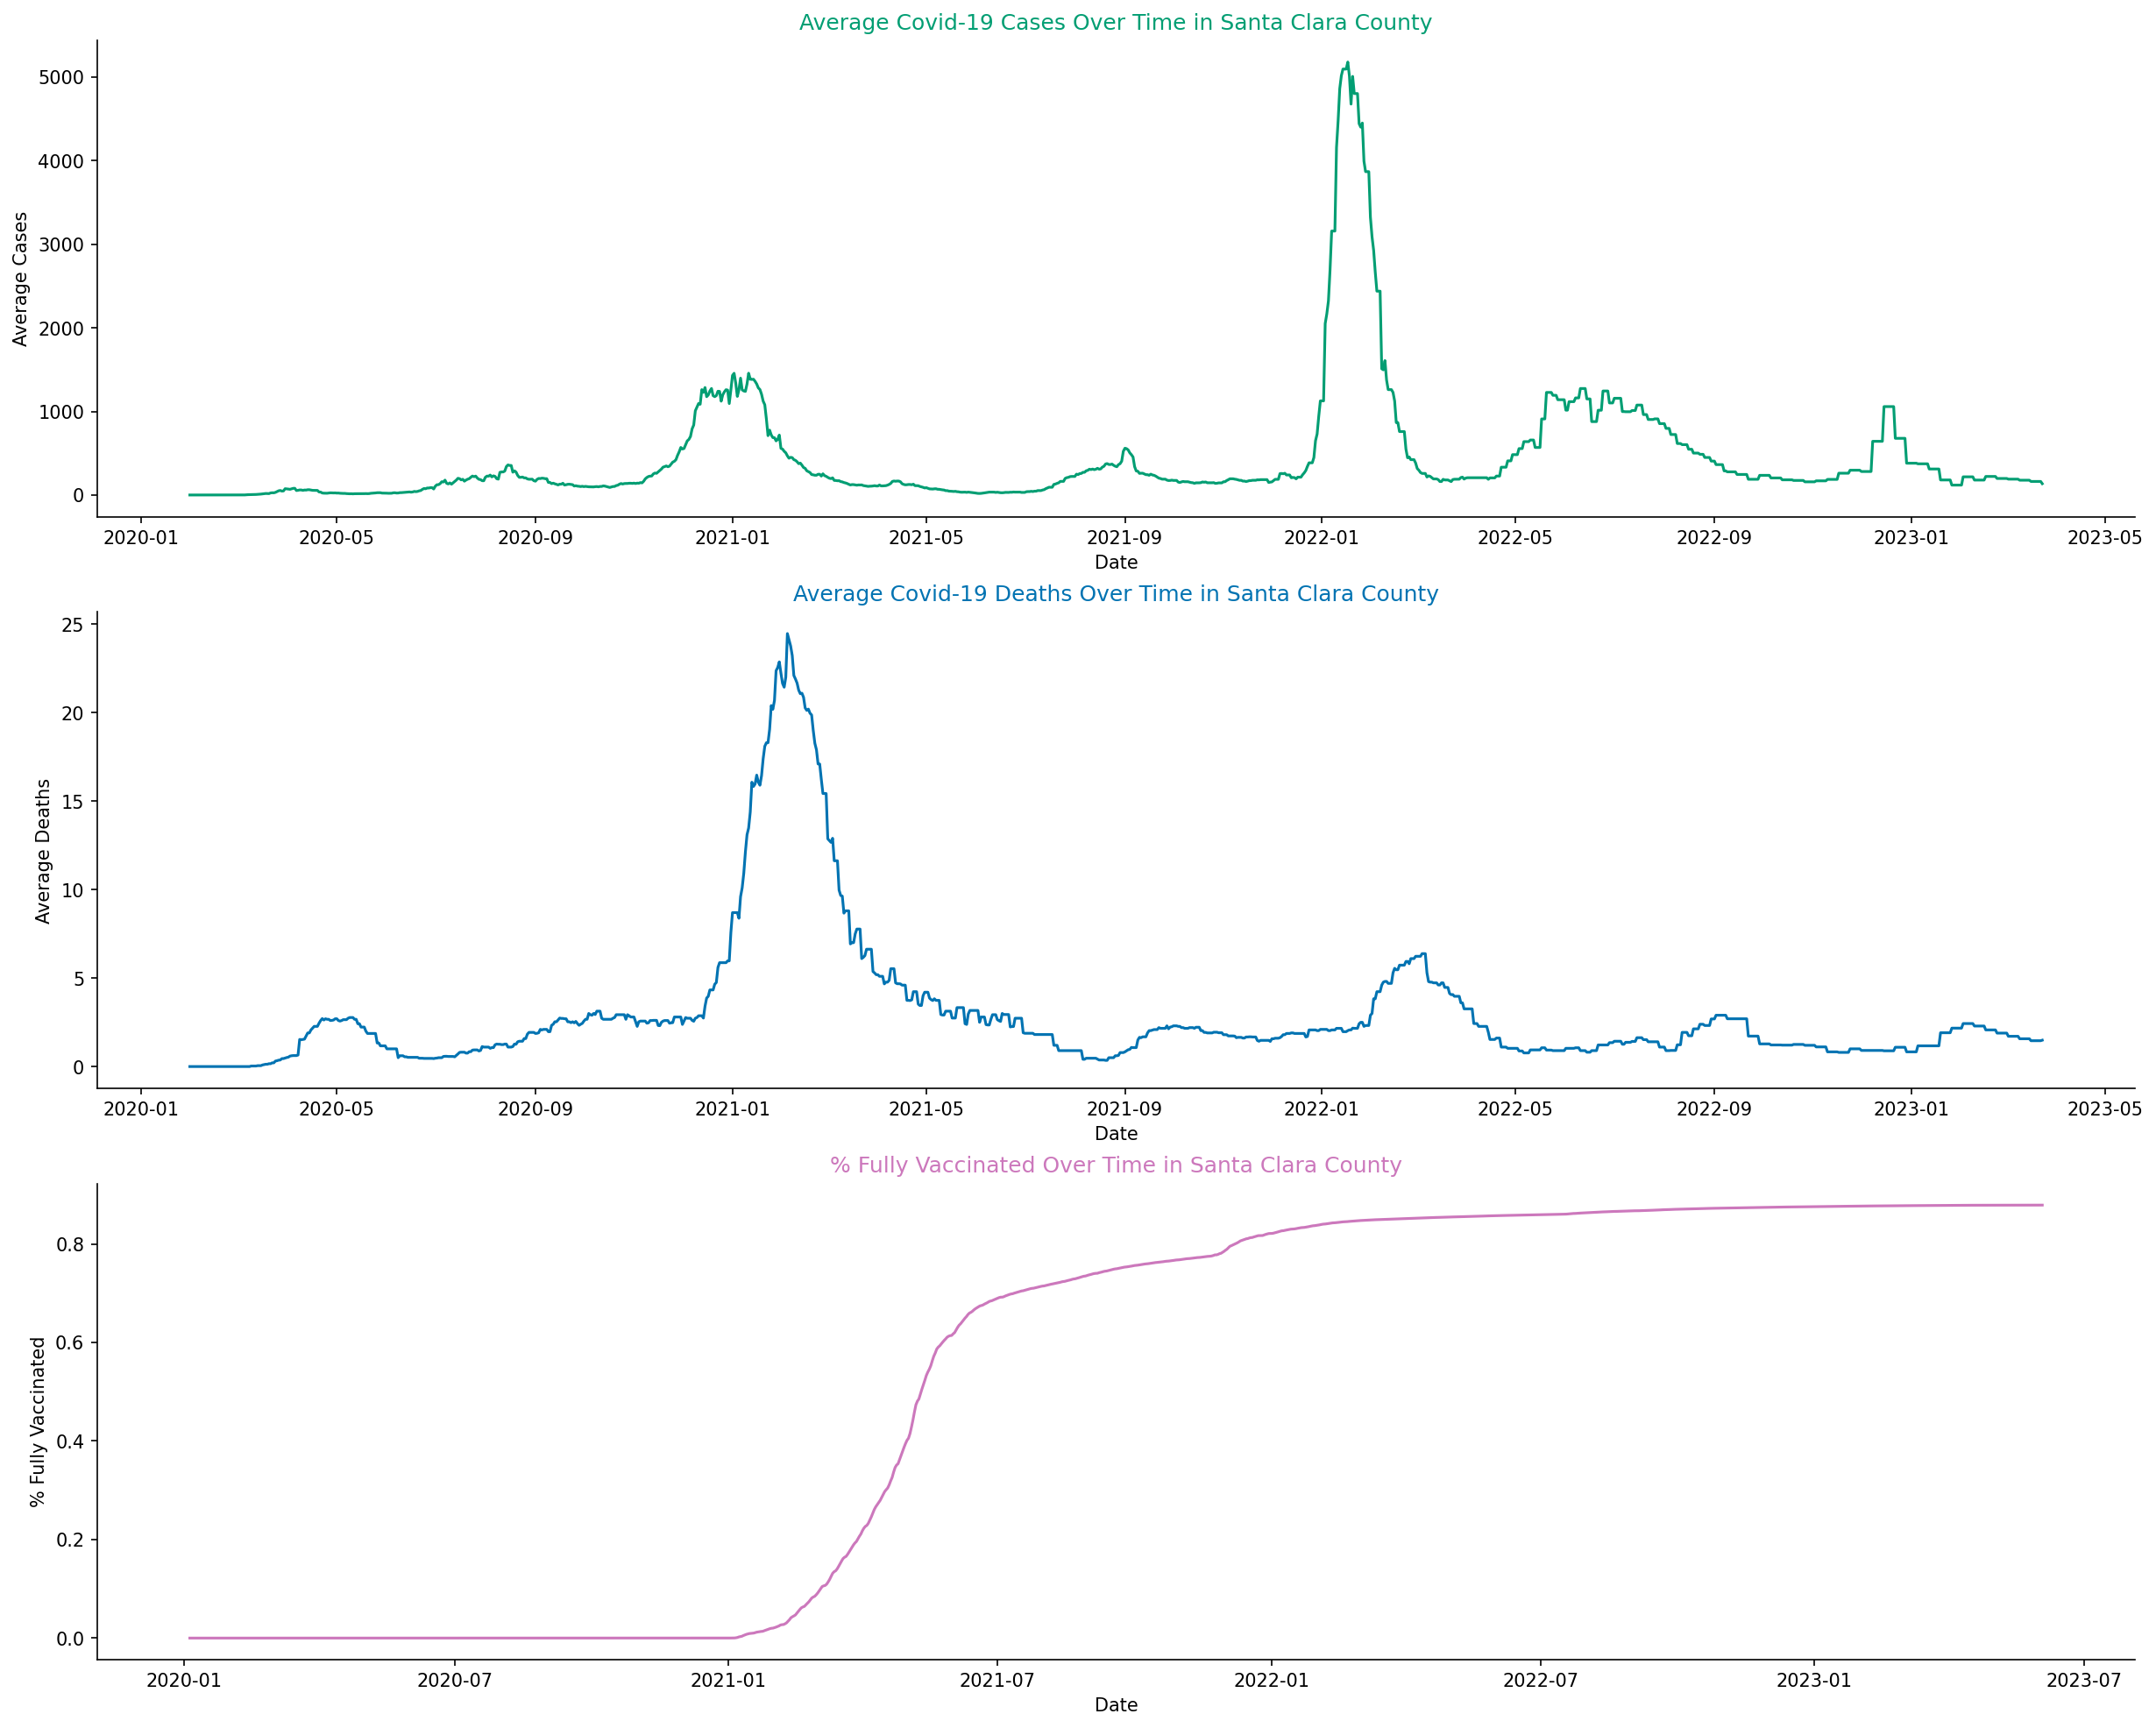

In [ ]:
fig, sub = plt.subplots(3, 1, figsize = (20, 16), dpi = 150, sharex=False)                                         # creates a plot to visualize the Santa Clara County data
                                                                                                                    # 3 plots arranged vertically
                                                                                                                    # the figure size is 20 by 16
                                                                                                                    # 150 dots per inch
                                                                                                                    # each subplot has it's own x-axis (they all go by date, but I think this looks better)

sub[0].plot(sc_data['date'], sc_data['cases_avg'], color=colors[2], label= "Cases")                               # plots sc_data
                                                                                                                    # independent variable (x) is "date"
                                                                                                                    # dependent variable (y) is "cases_avg"
                                                                                                                    # the color is 2 from the seaborn palette colorblind
                                                                                                                    # labeled as "Cases"

sub[1].plot(sc_data['date'], sc_data['deaths_avg'], color=colors[0], label= "Deaths")                             # plots sc_data
                                                                                                                    # independent variable (x) is "date"
                                                                                                                    # dependent variable (y) is "deaths_avg"
                                                                                                                    # the color is 0 from the seaborn palette colorblind
                                                                                                                    # labeled as "Deaths"

sub[2].plot(sc_vax['date'], sc_vax['fully_vaccinated_percent'], color=colors[4], label= "% Fully Vaccinated")     # plots sc_vax
                                                                                                                    # independent variable (x) is "date"
                                                                                                                    # dependent variable (y) is "fully_vaccinated_percent"
                                                                                                                    # the color is 4 from the seaborn palette colorblind
                                                                                                                    # labeled as "% Fully Vaccinated"

sub[0].set_xlabel('Date')                                                                                         # sets x-axis label for cases sub-plot, "Date"
sub[1].set_xlabel('Date')                                                                                         # sets x-axis label for deaths sub-plot, "Date"
sub[2].set_xlabel('Date')                                                                                         # sets x-axis label for % Full Vaccinated sub-plot, "Date"
sub[0].set_ylabel('Average Cases')                                                                                # sets y-axis label for cases sub-plot, "Average Cases"
sub[1].set_ylabel('Average Deaths')                                                                               # sets y-axis label for deaths sub-plot, "Average Deaths"
sub[2].set_ylabel('% Fully Vaccinated')                                                                           # sets y-axis label for % Fully Vaccinated sub-plot, "% Fully Vaccinated"
sub[0].set_title('Average Covid-19 Cases Over Time in Santa Clara County',  color=colors[2])                      # sets the title for the cases sub-plot, "Average Covid-19 Cases Over Time in Santa Clara County"
sub[1].set_title('Average Covid-19 Deaths Over Time in Santa Clara County', color=colors[0])                      # sets the title for the deaths sub-plot, "Average Covid-19 Deaths Over Time in Santa Clara County"
sub[2].set_title('% Fully Vaccinated Over Time in Santa Clara County', color=colors[4])                           # sets the title for % fully vaccinated sub-plot, "% Fully Vaccinated Over Time in Santa Clara County"
sb.despine()                                                                                                      # removes graph borders


##**Part 2**

## 2) Part 2: Exploring the data more!
**You may choose what to explore about the data in part 2**. At some point during this process, make sure you are **asking a question** and trying to answer it with the data. Can you find out something interesting? **Here are some suggestions**:
#### Relatively easy ideas:
* Make a similar county plot as you made in 1C, but include another 2-3 counties near your county so you can compare and contrast the dynamics of cases, deaths, and vaccinations. Since you are comparing counties with different population sizes on the same plot, you should use cases_avg_per_100k and deaths_avg_per_100k instead of just cases_avg and deaths_avg, in order to control for those population size differences.
* Measure R at a few time intervals for your county. Compare and contrast your results with your results for New York and California above. Make sure to check that your data for the time intervals isn’t too noisy – it’s possible for little fluctuations to affect the slope of log_deaths vs. time if the counts are low.
* Do some research to add some human aspect to the story of Covid-19 in your county, and annotate your plot (either in pyplot or on another image editing program). One example of an annotation you could add is when lockdowns or mask mandates began or ended, but you could also mark more specific events, like specific people who are important to the community or to you getting sick or vaccinated.
#### More difficult ideas:
* Look at the the relationship between politics (voting results from the 2020 election), vaccination rates, and covid deaths since the start of the summer. You can ask this question specifically at the county level in California, using the `county_vax` dataframe, the `county_data` dataframe, and the county voting data available here: `'https://raw.githubusercontent.com/tonmcg/US_County_Level_Election_Results_08-20/master/2020_US_County_Level_Presidential_Results.csv'`. This will likely require you to:
    * Filter the `county_vax` dataframe to just get data from a single date (one row per county)
    * Filter the `county_data` dataframe to get dates starting around June 2021, and then use `.groupby` and `.sum` to get the total number of deaths and cases per 100k in that time frame for each county
    * Manipulate the FIPS or county_name columns in each of the 3 datasets to be able to merge them
* Pick a country whose data you would like to explore, or ask a question about why some countries have done better than others (see the Our World in Data dataset below). Keep in mind that different countries have different standards for reporting cases and deaths, so the data quality may be variable.
* Look into the variant data from the LA Times dataset and see if you can measure differences in R between variants in certain time intervals when multiple variants were present in California
* Look into the prison data in either the LA Times or NY Times datasets - how did Covid-19 affect prison populations as compared to the general public?
* Look at the mask use survey data from the NY Times from the summer of 2020. Does these mask use survey results correlate with voting patterns in US counties? With vaccination rates? With Covid cases or deaths? Similar to the question above, this will likely require some data manipulation and merging

* Or you can come up with your own idea!

Dataset links:

* [LA Times covid data](https://github.com/datadesk/california-coronavirus-data)
* [New York Times covid data](https://github.com/nytimes/covid-19-data)
* [Our world in data (covid data)](https://github.com/owid/covid-19-data)
* [Our world in data (general worldwide datasets)](https://github.com/owid/owid-datasets/tree/master/datasets)
* [Datasets from dataopian](https://github.com/datasets)

Clearly introduce your question and your hypothesis. Explain what data you are using to explore this question.

Include at least one figure that shows data relevant to the question.

Briefly explain your results
  * You may not have been able to answer your question with the data - that is OK
  * Briefly explain what the data says about your question.
  * Remember, correlation does not equal causation, but together with other data / information, we can say what the data "suggests" at least! Rule of thumb: be honest, ask yourself what do you think is happening in the data, and report any statistical test results openly.

In [ ]:
# Your question for Part 2:

  # Did the vaccine improve the rates of covid-19 cases and deaths California, New York, Texas, and Florida (the 4 most populous states)?

  # Higher vaccination rates will show a reduced number of cases/deaths

# Data Sources:
  # Covid-19 case/death data:
    # NY Times: state_data
  # Covid-19 vaccination data:
    # Our World in Data: state_vax




In [ ]:
# Your code for Part 2:

#Pseudocode:
  # Use previously imported libraries/packages from part 1
  # Use previously imported datasets from part 1:
    # NY Times: state_data
    # Our World in Data: state_vax

  # Filter state_data by state and date
    # Filter by state to get separate data sets for California (CA), New York (NY), Texas (TX), and Florida (FL)
    # Filter by date so I can separate out the data for each state:
      # Aefore the vaccine was released (1/1/2020 through 1/12/2021)
      # After the vaccine was released (so it matches the state vax data, this will be 1,12,2021 through 5/10/2023)
      # Make a function to achieve this:
        # Define the function as "date_state" with the parameters "state," "start_date," and "end_date"
          # add a docstring to describe the function
          # the variable "data" is assigned to state_data indexed by state_data["state"] equals state
          # the variable "time" is assigned to data indexed by data["date"] is greater than or equal to "start_date" and data["date"] is less than or equal to "end_date"
          # return time
    # Use the date_state function to filter out state data by state and a date range:
      # ca_aftervax is equal to California, from 1/12/2021 to 5/10/2023
      # ny_aftervax is equal to New York, from 1/12/2021 to 5/10/2023
      # tx_aftervax is equal to Texas, from 1/12/2021 to 5/10/2023
      # fl_aftervax is equal to Florida, from 1/12/2021 to 5/10/2023
      # ca_prevax is equal to California, from 1/1/2020 to 1/12/2021
      # ny_prevax is equal to New York, from 1/1/2020 to 1/12/2021
      # tx_prevax is equal to Texas, from 1/1/2020 to 1/12/2021
      # fl_prevax is equal to Florida, from 1/1/2020 to 1/12/2021
    # use .head from pandas to check first 3 rows of:
      # ca_aftervax
      # ny_aftervax
      # tx_aftervax
      # fl_aftervax
      # ca_prevax
      # ny_prevax
      # tx_prevax
      # fl_prevax

  #Filter state_vax data by state:
    # define the function "vax_state" with the parameter "state"
      # the variable data is assigned to state_vax indexed by state_vax[location] equals state
      # return data
    # use vax_state function to get the data for California, New York, Texas, and Florida
      # ca_vax is equal to vax_state("California")
      # ny_vax is equal to vax_state("New York State")
      # tx_vax is equal to vax_state("Texas")
      # fl_vax is equal to vax_state("Florida")
    # use .head to check the first 3 rows:
      # ca_vax
      # ny_vax
      # tx_vax
      # fl_vax

  # plot data
    # Plot after vaccine data:
      # After vaccine covid-19 death data:
        # time based plot:
          # create a plot with matplotlib.pyplot to show the progression of covid deaths over time in CA, NY, TX, FL
            # fig, sub equals plt.subplot, then include general plot information in paranthesis, such as number of plots/subplots, size of figure, dpi (dots per inch), and if the figures share an x-axis
            # use plt.plot to graph the "date" collum as the independent variable, and "deaths_avg_per_100k" as the dependent variable for "ca_aftervax"
              # within the paranthesis, include independent variable (x), dependent variable (y), the color you want the data to be visualized as, and a label
            # use plt.plot to graph the "date" collum as the independent variable, and "deaths_avg_per_100k" as the dependent variable for "ny_aftervax"
              # within the paranthesis, include independent variable (x), dependent variable (y), the color you want the data to be visualized as, and a label
            # use plt.plot to graph the "date" collum as the independent variable, and "deaths_avg_per_100k" as the dependent variable for "tx_aftervax"
              # within the paranthesis, include independent variable (x), dependent variable (y), the color you want the data to be visualized as, and a label
            # use plt.plot to graph the "date" collum as the independent variable, and "deaths_avg_per_100k" as the dependent variable for "fl_aftervax"
              # within the paranthesis, include independent variable (x), dependent variable (y), the color you want the data to be visualized as, and a label
            # set a label for the x-axis, in this case "date"
            # set a label for the y-axis, in this case "deaths per 100k"
            # add a title to the graph
            # make a legend to help the people who will read the graph distingush the data
            # use sb.despine to remove the borders of the plot
        # bar plot:
          # create a plot with matplotlib.pyplot to show the progression of covid deaths over time in CA, NY, TX, FL
            # fig, sub equals plt.subplot, then include general plot information in paranthesis, such as number of plots/subplots, size of figure, dpi (dots per inch), and if the figures share an x-axis
            # use plt.bar to graph the "state" collum as the independent variable, and "deaths_avg_per_100k" as the dependent variable for "ca_aftervax"
              # within the paranthesis, include independent variable (x), dependent variable (y), the color you want the data to be visualized as, and a label
            # use plt.bar to graph the "state" collum as the independent variable, and "deaths_avg_per_100k" as the dependent variable for "ny_aftervax"
              # within the paranthesis, include independent variable (x), dependent variable (y), the color you want the data to be visualized as, and a label
            # use plt.bar to graph the "state" collum as the independent variable, and "deaths_avg_per_100k" as the dependent variable for "tx_aftervax"
              # within the paranthesis, include independent variable (x), dependent variable (y), the color you want the data to be visualized as, and a label
            # use plt.bar to graph the "state" collum as the independent variable, and "deaths_avg_per_100k" as the dependent variable for "fl_aftervax"
              # within the paranthesis, include independent variable (x), dependent variable (y), the color you want the data to be visualized as, and a label
            # set a label for the x-axis, in this case "state"
            # set a label for the y-axis, in this case "deaths per 100k"
            # add a title to the graph
            # make a legend to help the people who will read the graph distingush the data
            # use sb.despine to remove the borders of the plot

      # After vaccine covid-19 case data:
        # time based plot:
          # create a plot with matplotlib.pyplot to show the progression of covid cases over time in CA, NY, TX, FL
            # fig, sub equals plt.subplot, then include general plot information in paranthesis, such as number of plots/subplots, size of figure, dpi (dots per inch), and if the figures share an x-axis
            # use plt.plot to graph the "date" collum as the independent variable, and "cases_avg_per_100k" as the dependent variable for "ca_aftervax"
              # within the paranthesis, include independent variable (x), dependent variable (y), the color you want the data to be visualized as, and a label
            # use plt.plot to graph the "date" collum as the independent variable, and "dcases_avg_per_100k" as the dependent variable for "ny_aftervax"
              # within the paranthesis, include independent variable (x), dependent variable (y), the color you want the data to be visualized as, and a label
            # use plt.plot to graph the "date" collum as the independent variable, and "cases_avg_per_100k" as the dependent variable for "tx_aftervax"
              # within the paranthesis, include independent variable (x), dependent variable (y), the color you want the data to be visualized as, and a label
            # use plt.plot to graph the "date" collum as the independent variable, and "cases_avg_per_100k" as the dependent variable for "fl_aftervax"
              # within the paranthesis, include independent variable (x), dependent variable (y), the color you want the data to be visualized as, and a label
            # set a label for the x-axis, in this case "date"
            # set a label for the y-axis, in this case "cases per 100k"
            # add a title to the graph
            # make a legend to help the people who will read the graph distingush the data
            # use sb.despine to remove the borders of the plot
        # bar plot:
          # create a bar plot with matplotlib.pyplot to show the progression of covid cases over time in CA, NY, TX, FL
            # fig, sub equals plt.subplot, then include general plot information in paranthesis, such as number of plots/subplots, size of figure, dpi (dots per inch), and if the figures share an x-axis
            # use plt.bar to graph the "state" collum as the independent variable, and "cases_avg_per_100k" as the dependent variable for "ca_aftervax"
              # within the paranthesis, include independent variable (x), dependent variable (y), the color you want the data to be visualized as, and a label
            # use plt.bar to graph the "state" collum as the independent variable, and "cases_avg_per_100k" as the dependent variable for "ny_aftervax"
              # within the paranthesis, include independent variable (x), dependent variable (y), the color you want the data to be visualized as, and a label
            # use plt.bar to graph the "state" collum as the independent variable, and "cases_avg_per_100k" as the dependent variable for "tx_aftervax"
              # within the paranthesis, include independent variable (x), dependent variable (y), the color you want the data to be visualized as, and a label
            # use plt.bar to graph the "state" collum as the independent variable, and "cases_avg_per_100k" as the dependent variable for "fl_aftervax"
              # within the paranthesis, include independent variable (x), dependent variable (y), the color you want the data to be visualized as, and a label
            # set a label for the x-axis, in this case "state"
            # set a label for the y-axis, in this case "cases per 100k"
            # add a title to the graph
            # make a legend to help the people who will read the graph distingush the data
            # use sb.despine to remove the borders of the plot

    # Plot vaccination rate data:
      # time based plot:
        # create a plot with matplotlib.pyplot to show the progression of covid vaccination rates over time in CA, NY, TX, FL
            # fig, sub equals plt.subplot, then include general plot information in paranthesis, such as number of plots/subplots, size of figure, dpi (dots per inch), and if the figures share an x-axis
            # use plt.plot to graph the "date" collum as the independent variable, and "people_fully_vaccinated_per_hundred" as the dependent variable for "ca_vax"
              # within the paranthesis, include independent variable (x), dependent variable (y), the color you want the data to be visualized as, and a label
            # use plt.plot to graph the "date" collum as the independent variable, and "people_fully_vaccinated_per_hundred" as the dependent variable for "ny_vax"
              # within the paranthesis, include independent variable (x), dependent variable (y), the color you want the data to be visualized as, and a label
            # use plt.plot to graph the "date" collum as the independent variable, and "people_fully_vaccinated_per_hundred" as the dependent variable for "tx_vax"
              # within the paranthesis, include independent variable (x), dependent variable (y), the color you want the data to be visualized as, and a label
            # use plt.plot to graph the "date" collum as the independent variable, and "people_fully_vaccinated_per_hundred" as the dependent variable for "fl_vax"
              # within the paranthesis, include independent variable (x), dependent variable (y), the color you want the data to be visualized as, and a label
            # set a label for the x-axis, in this case "date"
            # set a label for the y-axis, in this case "Full Vaccinations per 100k"
            # add a title to the graph
            # make a legend to help the people who will read the graph distingush the data
            # use sb.despine to remove the borders of the plot
      # bar plot:
        # create a bar plot with matplotlib.pyplot to show the progression of covid vaccination rates over time in CA, NY, TX, FL
            # fig, sub equals plt.subplot, then include general plot information in paranthesis, such as number of plots/subplots, size of figure, dpi (dots per inch), and if the figures share an x-axis
            # use plt.bar to graph the "state" collum as the independent variable, and "people_fully_vaccinated_per_hundred" as the dependent variable for "ca_vax"
              # within the paranthesis, include independent variable (x), dependent variable (y), the color you want the data to be visualized as, and a label
            # use plt.bar to graph the "state" collum as the independent variable, and "people_fully_vaccinated_per_hundred" as the dependent variable for "ny_vax"
              # within the paranthesis, include independent variable (x), dependent variable (y), the color you want the data to be visualized as, and a label
            # use plt.bar to graph the "state" collum as the independent variable, and "people_fully_vaccinated_per_hundred" as the dependent variable for "tx_vax"
              # within the paranthesis, include independent variable (x), dependent variable (y), the color you want the data to be visualized as, and a label
            # use plt.bar to graph the "state" collum as the independent variable, and "people_fully_vaccinated_per_hundred" as the dependent variable for "fl_vax"
              # within the paranthesis, include independent variable (x), dependent variable (y), the color you want the data to be visualized as, and a label
            # set a label for the x-axis, in this case "state"
            # set a label for the y-axis, in this case "Full Vaccinations per 100k"
            # add a title to the graph
            # make a legend to help the people who will read the graph distingush the data
            # use sb.despine to remove the borders of the plot

    # Plot pre vaccine data:
      # Pre vaccine death data:
        # time based plot:
          # create a plot with matplotlib.pyplot to show the progression of covid deaths over time in CA, NY, TX, FL
            # fig, sub equals plt.subplot, then include general plot information in paranthesis, such as number of plots/subplots, size of figure, dpi (dots per inch), and if the figures share an x-axis
            # use plt.plot to graph the "date" collum as the independent variable, and "deaths_avg_per_100k" as the dependent variable for "ca_prevax"
              # within the paranthesis, include independent variable (x), dependent variable (y), the color you want the data to be visualized as, and a label
            # use plt.plot to graph the "date" collum as the independent variable, and "deaths_avg_per_100k" as the dependent variable for "ny_prevax"
              # within the paranthesis, include independent variable (x), dependent variable (y), the color you want the data to be visualized as, and a label
            # use plt.plot to graph the "date" collum as the independent variable, and "deaths_avg_per_100k" as the dependent variable for "tx_prevax"
              # within the paranthesis, include independent variable (x), dependent variable (y), the color you want the data to be visualized as, and a label
            # use plt.plot to graph the "date" collum as the independent variable, and "deaths_avg_per_100k" as the dependent variable for "fl_prevax"
              # within the paranthesis, include independent variable (x), dependent variable (y), the color you want the data to be visualized as, and a label
            # set a label for the x-axis, in this case "date"
            # set a label for the y-axis, in this case "deaths per 100k"
            # add a title to the graph
            # make a legend to help the people who will read the graph distingush the data
            # use sb.despine to remove the borders of the plot
        # bar plot:
          #create a bar plot with matplotlib.pyplot to show the progression of covid deaths over time in CA, NY, TX, FL
            # fig, sub equals plt.subplot, then include general plot information in paranthesis, such as number of plots/subplots, size of figure, dpi (dots per inch), and if the figures share an x-axis
            # use plt.bar to graph the "state" collum as the independent variable, and "deaths_avg_per_100k" as the dependent variable for "ca_prevax"
              # within the paranthesis, include independent variable (x), dependent variable (y), the color you want the data to be visualized as, and a label
            # use plt.bar to graph the "state" collum as the independent variable, and "deaths_avg_per_100k" as the dependent variable for "ny_prevax"
              # within the paranthesis, include independent variable (x), dependent variable (y), the color you want the data to be visualized as, and a label
            # use plt.bar to graph the "state" collum as the independent variable, and "deaths_avg_per_100k" as the dependent variable for "tx_prevax"
              # within the paranthesis, include independent variable (x), dependent variable (y), the color you want the data to be visualized as, and a label
            # use plt.bar to graph the "state" collum as the independent variable, and "deaths_avg_per_100k" as the dependent variable for "fl_prevax"
              # within the paranthesis, include independent variable (x), dependent variable (y), the color you want the data to be visualized as, and a label
            # set a label for the x-axis, in this case "state"
            # set a label for the y-axis, in this case "deaths per 100k"
            # add a title to the graph
            # make a legend to help the people who will read the graph distingush the data
            # use sb.despine to remove the borders of the plot

      # Pre vaccine case data:
        # time based plot:
          # create a plot with matplotlib.pyplot to show the progression of covid cases over time in CA, NY, TX, FL
            # fig, sub equals plt.subplot, then include general plot information in paranthesis, such as number of plots/subplots, size of figure, dpi (dots per inch), and if the figures share an x-axis
            # use plt.plot to graph the "date" collum as the independent variable, and "cases_avg_per_100k" as the dependent variable for "ca_prevax"
              # within the paranthesis, include independent variable (x), dependent variable (y), the color you want the data to be visualized as, and a label
            # use plt.plot to graph the "date" collum as the independent variable, and "dcases_avg_per_100k" as the dependent variable for "ny_prevax"
              # within the paranthesis, include independent variable (x), dependent variable (y), the color you want the data to be visualized as, and a label
            # use plt.plot to graph the "date" collum as the independent variable, and "cases_avg_per_100k" as the dependent variable for "tx_prevax"
              # within the paranthesis, include independent variable (x), dependent variable (y), the color you want the data to be visualized as, and a label
            # use plt.plot to graph the "date" collum as the independent variable, and "cases_avg_per_100k" as the dependent variable for "fl_prevax"
              # within the paranthesis, include independent variable (x), dependent variable (y), the color you want the data to be visualized as, and a label
            # set a label for the x-axis, in this case "date"
            # set a label for the y-axis, in this case "cases per 100k"
            # add a title to the graph
            # make a legend to help the people who will read the graph distingush the data
            # use sb.despine to remove the borders of the plot
        # bar plot:
          # create a bar plot with matplotlib.pyplot to show the progression of covid cases over time in CA, NY, TX, FL
            # fig, sub equals plt.subplot, then include general plot information in paranthesis, such as number of plots/subplots, size of figure, dpi (dots per inch), and if the figures share an x-axis
            # use plt.bar to graph the "state" collum as the independent variable, and "cases_avg_per_100k" as the dependent variable for "ca_prevax"
              # within the paranthesis, include independent variable (x), dependent variable (y), the color you want the data to be visualized as, and a label
            # use plt.bar to graph the "state" collum as the independent variable, and "dcases_avg_per_100k" as the dependent variable for "ny_prevax"
              # within the paranthesis, include independent variable (x), dependent variable (y), the color you want the data to be visualized as, and a label
            # use plt.bar to graph the "state" collum as the independent variable, and "cases_avg_per_100k" as the dependent variable for "tx_prevax"
              # within the paranthesis, include independent variable (x), dependent variable (y), the color you want the data to be visualized as, and a label
            # use plt.bar to graph the "state" collum as the independent variable, and "cases_avg_per_100k" as the dependent variable for "fl_prevax"
              # within the paranthesis, include independent variable (x), dependent variable (y), the color you want the data to be visualized as, and a label
            # set a label for the x-axis, in this case "state"
            # set a label for the y-axis, in this case "cases per 100k"
            # add a title to the graph
            # make a legend to help the people who will read the graph distingush the data
            # use sb.despine to remove the borders of the plot


In [ ]:
def date_state(state, start_date, end_date):                              # to filter state_data by a particular state and date range
  '''to filter state data by state and date range'''                      # docstring to describe function
  data = state_data[state_data['state'] == state ]                        # filters data by state parameter
  time = data[(data['date'] >= start_date) & (data['date'] <= end_date)]  # filters data by time range beginning with start_data parameter and ending withe end_date
  return time                                                             # returns the variable time

In [ ]:
ca_aftervax = date_state('California', dt.datetime(2021,1,12), dt.datetime(2023,5,10))  # runs date_state function with California, 1/12/21, and 5/10/23 inputed for the parameters
ny_aftervax = date_state('New York', dt.datetime(2021,1,12), dt.datetime(2023,5,10))    # runs date_state function with New York, 1/12/21, and 5/10/23 inputed for the parameters
tx_aftervax = date_state('Texas', dt.datetime(2021,1,12), dt.datetime(2023,5,10))       # runs date_state function with Texas, 1/12/21, and 5/10/23 inputed for the parameters
fl_aftervax = date_state('Florida', dt.datetime(2021,1,12), dt.datetime(2023,5,10))     # runs date_state function with Florida, 1/12/21, and 5/10/23 inputed for the parameters


In [ ]:
ca_prevax = date_state('California', dt.datetime(2020,1,1), dt.datetime(2021,1,12))     # runs date_state function with California, 1/2/20, and 1/12/21 inputed for the parameters
ny_prevax = date_state('New York', dt.datetime(2020,1,1), dt.datetime(2021,1,12))       # runs date_state function with New York, 1/2/20, and 1/12/21 inputed for the parameters
tx_prevax = date_state('Texas', dt.datetime(2020,1,1), dt.datetime(2021,1,12))          # runs date_state function with Texas, 1/2/20, and 1/12/21 inputed for the parameters
fl_prevax = date_state('Florida', dt.datetime(2020,1,1), dt.datetime(2021,1,12))        # runs date_state function with Florida, 1/2/20, and 1/12/21 inputed for the parameters


In [ ]:
ca_aftervax.head(3)   # shows first 3 rows of variable ca_aftervax

,date,geoid,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,day_index,log_deaths
17389,2021-01-12,USA-06,California,45884,43491.86,110.07,724,517.00,1.31,377,6.248043
17444,2021-01-13,USA-06,California,41675,44173.00,111.80,548,516.14,1.31,378,6.246378
17499,2021-01-14,USA-06,California,40715,44215.14,111.90,593,527.43,1.33,379,6.268016


In [ ]:
ny_aftervax.head(3)   # shows first 3 rows of variable ny_aftervax

,date,geoid,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,day_index,log_deaths
17361,2021-01-12,USA-36,New York,14791,16611.57,85.39,184,181.86,0.93,377,5.203237
17416,2021-01-13,USA-36,New York,14704,16424.14,84.43,172,182.00,0.94,378,5.204007
17471,2021-01-14,USA-36,New York,14187,15938.29,81.93,237,187.71,0.96,379,5.234898


In [ ]:
tx_aftervax.head(3)   # shows first 3 rows of variable tx_aftervax

,date,geoid,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,day_index,log_deaths
17350,2021-01-12,USA-48,Texas,27215,22079.71,76.15,297,295.43,1.02,377,5.688432
17405,2021-01-13,USA-48,Texas,23108,21763.43,75.06,379,302.57,1.04,378,5.712313
17460,2021-01-14,USA-48,Texas,29900,22802.57,78.64,423,310.57,1.07,379,5.738409


In [ ]:
fl_aftervax.head(3)   # shows first 3 rows of variable fl_aftervax

,date,geoid,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,day_index,log_deaths
17384,2021-01-12,USA-12,Florida,14896,15908.43,74.07,156,148.43,0.69,377,5.000113
17439,2021-01-13,USA-12,Florida,13990,15366.57,71.55,169,154.14,0.72,378,5.037861
17494,2021-01-14,USA-12,Florida,13720,14495.71,67.49,217,161.71,0.75,379,5.085805


In [ ]:
ca_prevax.head(3)     # shows first 3 rows of variable ca_prevax

,date,geoid,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,day_index,log_deaths
7,2020-01-25,USA-06,California,1,0.14,0.0,0,0.0,0.0,24,-inf
10,2020-01-26,USA-06,California,1,0.29,0.0,0,0.0,0.0,25,-inf
14,2020-01-27,USA-06,California,0,0.29,0.0,0,0.0,0.0,26,-inf


In [ ]:
ny_prevax.head(3)     # shows first 3 rows of variable ny_prevax

,date,geoid,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,day_index,log_deaths
246,2020-03-01,USA-36,New York,1,0.14,0.0,0,0.0,0.0,60,-inf
259,2020-03-02,USA-36,New York,0,0.14,0.0,0,0.0,0.0,61,-inf
275,2020-03-03,USA-36,New York,1,0.29,0.0,0,0.0,0.0,62,-inf


In [ ]:
tx_prevax.head(3)     # shows first 3 rows of variable tx_prevax

,date,geoid,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,day_index,log_deaths
96,2020-02-12,USA-48,Texas,1,0.14,0.0,0,0.0,0.0,42,-inf
103,2020-02-13,USA-48,Texas,1,0.29,0.0,0,0.0,0.0,43,-inf
110,2020-02-14,USA-48,Texas,0,0.29,0.0,0,0.0,0.0,44,-inf


In [ ]:
fl_prevax.head(3)     # shows first 3 rows of variable fl_prevax

,date,geoid,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,day_index,log_deaths
250,2020-03-01,USA-12,Florida,2,0.29,0.0,0,0.0,0.0,60,-inf
265,2020-03-02,USA-12,Florida,0,0.29,0.0,0,0.0,0.0,61,-inf
281,2020-03-03,USA-12,Florida,1,0.43,0.0,0,0.0,0.0,62,-inf


In [ ]:
def vax_state(state):                                   # creates a function to filter the state_vax data by a state inputed for the parameter "state"
  '''filters state_vax data by a particular state'''    # docstring to descibe the purpose of the function
  data = state_vax[state_vax['location'] == state ]     # filters state_vax by the state inputed by the parameter, assigns it to the variable data
  return data                                           # return data

In [ ]:
ca_vax = vax_state('California')          # runs vax_state function with the variable "California"
ny_vax = vax_state('New York State')      # runs vax_state function with the variable "New York"
tx_vax = vax_state('Texas')               # runs vax_state function with the variable "Texas"
fl_vax = vax_state('Florida')             # runs vax_state function with the variable "Florida"

In [ ]:
ca_vax.head(3)    # shows first 3 rows of variable ca_vax

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
5094,2021-01-12,California,816301.0,3286050.0,703540.0,0.25,2.07,100089.0,1.78,8.32,NaN,NaN,NaN,0.248,NaN,NaN
5095,2021-01-13,California,891489.0,3435650.0,744545.0,0.34,2.26,133689.0,1.88,8.70,75188.0,75188.0,1903.0,0.259,NaN,NaN
5096,2021-01-14,California,975293.0,3540175.0,801998.0,NaN,2.47,NaN,2.03,8.96,83804.0,79496.0,2012.0,0.275,NaN,NaN


In [ ]:
ny_vax.head(3)    # shows first 3 rows of variable ny_vax

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
33380,2021-01-12,New York State,579532.0,1622100.0,543014.0,0.19,2.98,36422.0,2.79,8.34,NaN,NaN,NaN,0.357,NaN,NaN
33381,2021-01-13,New York State,632473.0,1796850.0,587865.0,0.23,3.25,44512.0,3.02,9.24,52941.0,52941.0,2721.0,0.352,NaN,NaN
33382,2021-01-14,New York State,688576.0,1872625.0,617596.0,NaN,3.54,NaN,3.17,9.63,56103.0,54522.0,2803.0,0.368,NaN,NaN


In [ ]:
tx_vax.head(3)    # shows first 3 rows of variable tx_vax

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
45266,2021-01-12,Texas,911461.0,1949125.0,809148.0,0.35,3.14,101317.0,2.79,6.72,NaN,NaN,NaN,0.468,NaN,NaN
45267,2021-01-13,Texas,978042.0,1984225.0,861072.0,0.40,3.37,115965.0,2.97,6.84,66581.0,66581.0,2296.0,0.493,NaN,NaN
45268,2021-01-14,Texas,1043624.0,2105600.0,917387.0,NaN,3.60,NaN,3.16,7.26,65582.0,66082.0,2279.0,0.496,NaN,NaN


In [ ]:
fl_vax.head(3)    # shows first 3 rows of variable fl_vax

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
11037,2021-01-12,Florida,633440.0,1676300.0,586741.0,0.19,2.95,41725.0,2.73,7.80,NaN,NaN,NaN,0.378,NaN,NaN
11038,2021-01-13,Florida,705398.0,1680200.0,647330.0,0.25,3.28,52969.0,3.01,7.82,71958.0,71958.0,3350.0,0.420,NaN,NaN
11039,2021-01-14,Florida,774485.0,1970875.0,709002.0,NaN,3.61,NaN,3.30,9.18,69087.0,70522.0,3283.0,0.393,NaN,NaN


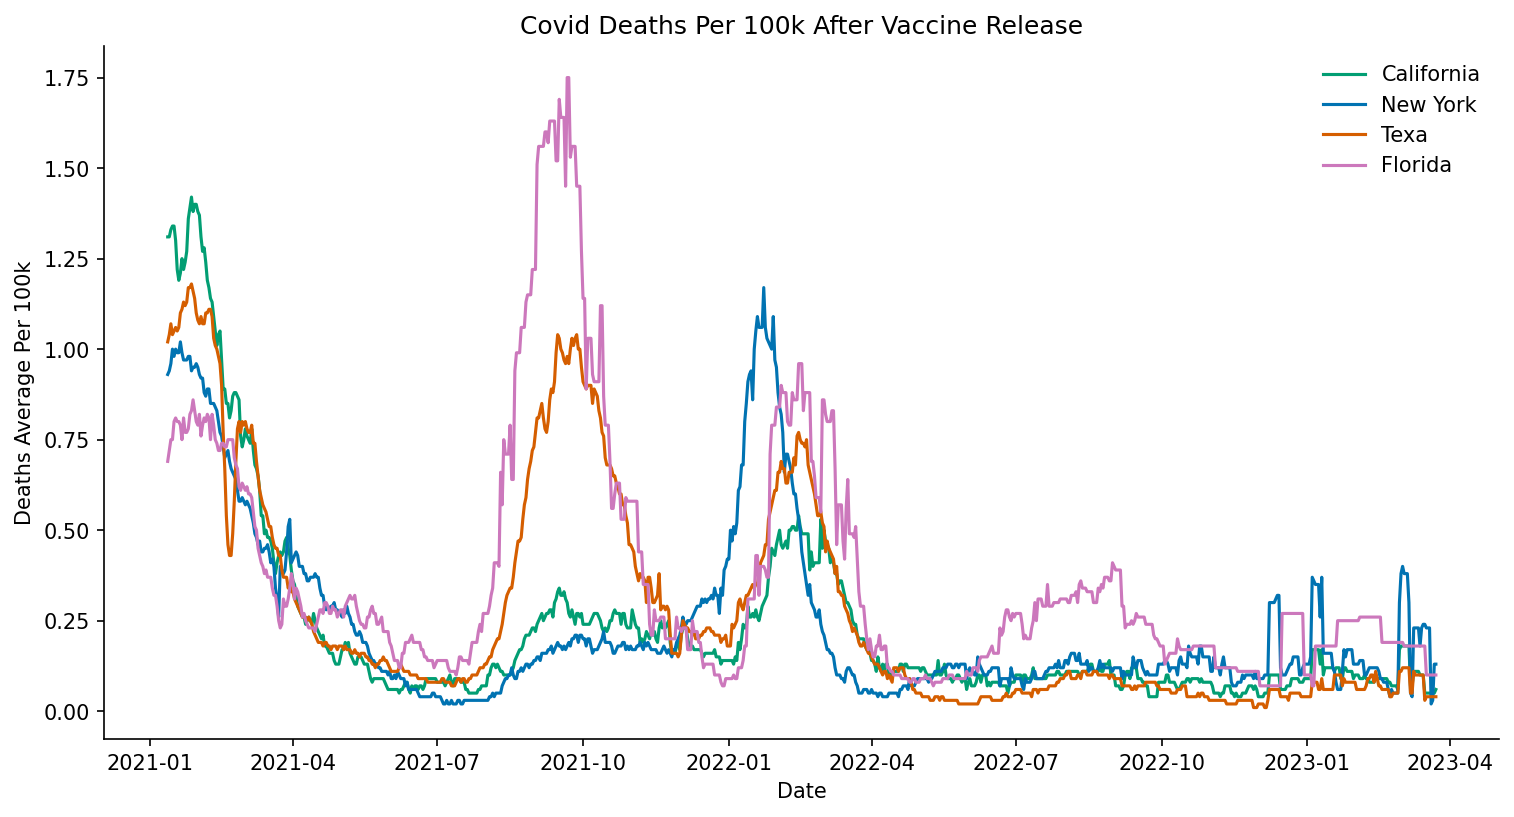

In [ ]:
fig, sub = plt.subplots(1, 1, figsize = (12, 6), dpi = 150, sharex=True)                                      # creates a plot to visualize the CA, NY, TX, FL data
                                                                                                                # 1 plot
                                                                                                                # the figure size is 12 by 6
                                                                                                                # 150 dots per inch
                                                                                                                # one x-axis

plt.plot(ca_aftervax['date'], ca_aftervax['deaths_avg_per_100k'], color=colors[2], label= "California")       # plots ca_aftervax
                                                                                                                # independent variable (x) is "date"
                                                                                                                # dependent variable (y) is "deaths_avg_per_100k"
                                                                                                                # the color is 2 from the seaborn palette colorblind
                                                                                                                # labeled as "California"
plt.plot(ny_aftervax['date'], ny_aftervax['deaths_avg_per_100k'], color=colors[0], label= "New York")         # plots ny_aftervax
                                                                                                                # independent variable (x) is "date"
                                                                                                                # dependent variable (y) is "deaths_avg_per_100k"
                                                                                                                # the color is 0 from the seaborn palette colorblind
                                                                                                                # labeled as "New York"
plt.plot(tx_aftervax['date'], tx_aftervax['deaths_avg_per_100k'], color=colors[3], label= "Texa")              # plots tx_aftervax
                                                                                                                # independent variable (x) is "date"
                                                                                                                # dependent variable (y) is "deaths_avg_per_100k"
                                                                                                                # the color is 3 from the seaborn palette colorblind
                                                                                                                # labeled as "Texas"
plt.plot(fl_aftervax['date'], fl_aftervax['deaths_avg_per_100k'], color=colors[4], label= "Florida")           # plots fl_aftervax
                                                                                                                # independent variable (x) is "date"
                                                                                                                # dependent variable (y) is "deaths_avg_per_100k"
                                                                                                                # the color is 4 from the seaborn palette colorblind
                                                                                                                # labeled as "Florida"                                                                                                              #
sub.set_ylabel('Deaths Average Per 100k')                                                                      # adds label to y-axis
sub.set_xlabel('Date')                                                                                         # adds label to x-axis
sub.set_title('Covid Deaths Per 100k After Vaccine Release')                                                   # adds title
sub.legend(frameon=False)                                                                                      # adds a legend
sb.despine()                                                                                                   # removes border around graph



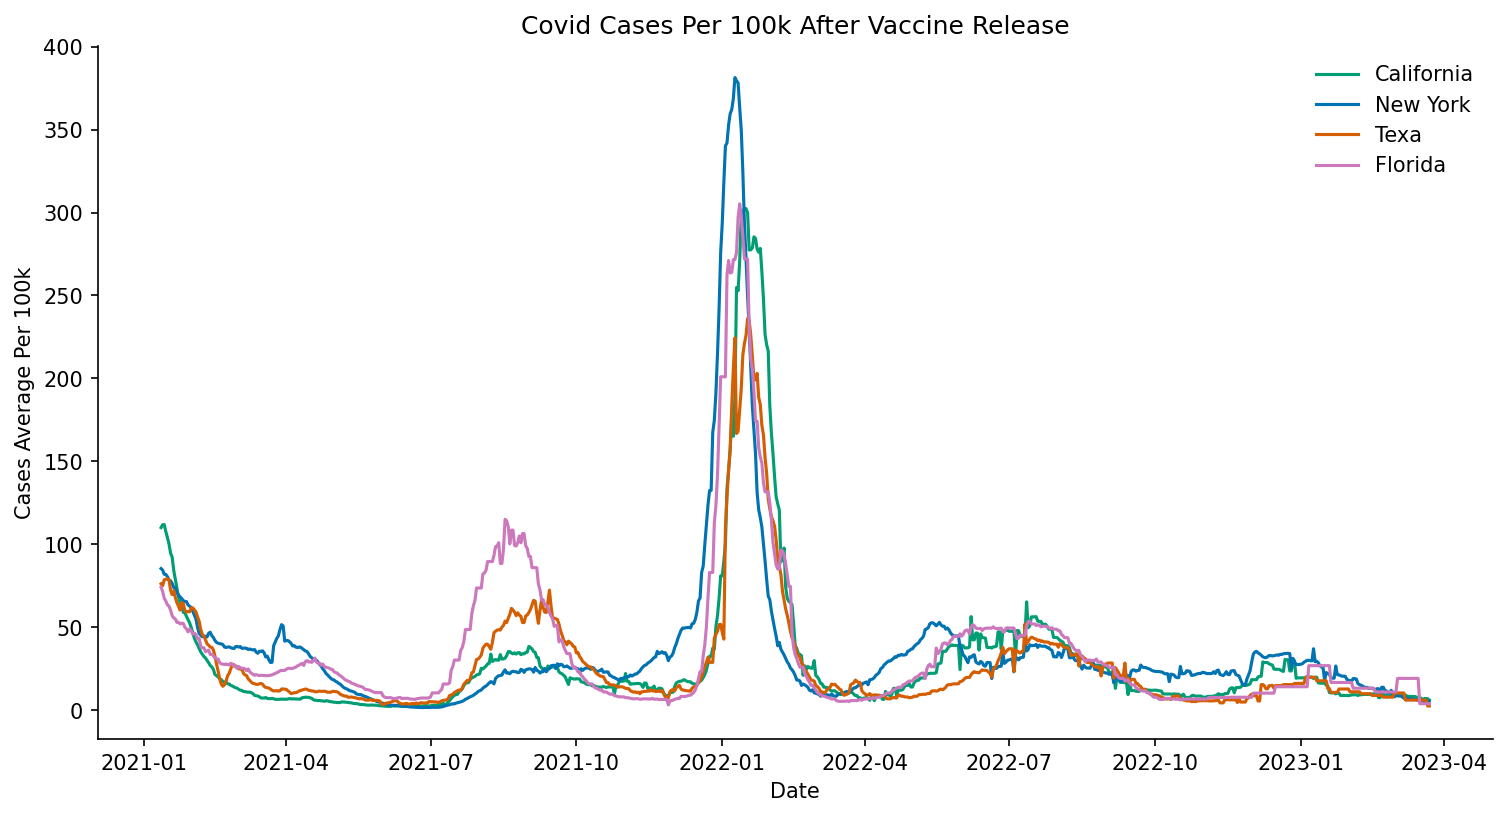

In [ ]:
fig, sub = plt.subplots(1, 1, figsize = (12, 6), dpi = 150, sharex=True)                                    # creates a plot to visualize the CA, NY, TX, FL data
                                                                                                              # 1 plot
                                                                                                              # the figure size is 12 by 6
                                                                                                              # 150 dots per inch
                                                                                                              # one x-axis

plt.plot(ca_aftervax['date'], ca_aftervax['cases_avg_per_100k'], color=colors[2], label= "California")      # plots ca_aftervax
                                                                                                              # independent variable (x) is "date"
                                                                                                              # dependent variable (y) is "case_avg_per_100k"
                                                                                                              # the color is 2 from the seaborn palette colorblind
                                                                                                              # labeled as "California"
plt.plot(ny_aftervax['date'], ny_aftervax['cases_avg_per_100k'], color=colors[0], label= "New York")         # plots ny_aftervax
                                                                                                                # independent variable (x) is "date"
                                                                                                                # dependent variable (y) is "cases_avg_per_100k"
                                                                                                                # the color is 0 from the seaborn palette colorblind
                                                                                                                # labeled as "New York"
plt.plot(tx_aftervax['date'], tx_aftervax['cases_avg_per_100k'], color=colors[3], label= "Texa")              # plots tx_aftervax
                                                                                                                # independent variable (x) is "date"
                                                                                                                # dependent variable (y) is "cases_avg_per_100k"
                                                                                                                # the color is 3 from the seaborn palette colorblind
                                                                                                                # labeled as "Texas"
plt.plot(fl_aftervax['date'], fl_aftervax['cases_avg_per_100k'], color=colors[4], label= "Florida")           # plots fl_aftervax
                                                                                                                # independent variable (x) is "date"
                                                                                                                # dependent variable (y) is "cases_avg_per_100k"
                                                                                                                # the color is 4 from the seaborn palette colorblind
                                                                                                                # labeled as "Florida"
sub.set_ylabel('Cases Average Per 100k')                                                                      # adds label to y-axis
sub.set_xlabel('Date')                                                                                        # adds label to x-axis
sub.set_title('Covid Cases Per 100k After Vaccine Release')                                                   # adds title
sub.legend(frameon=False)                                                                                     # adds a legend
sb.despine()                                                                                                  # removes border around graph

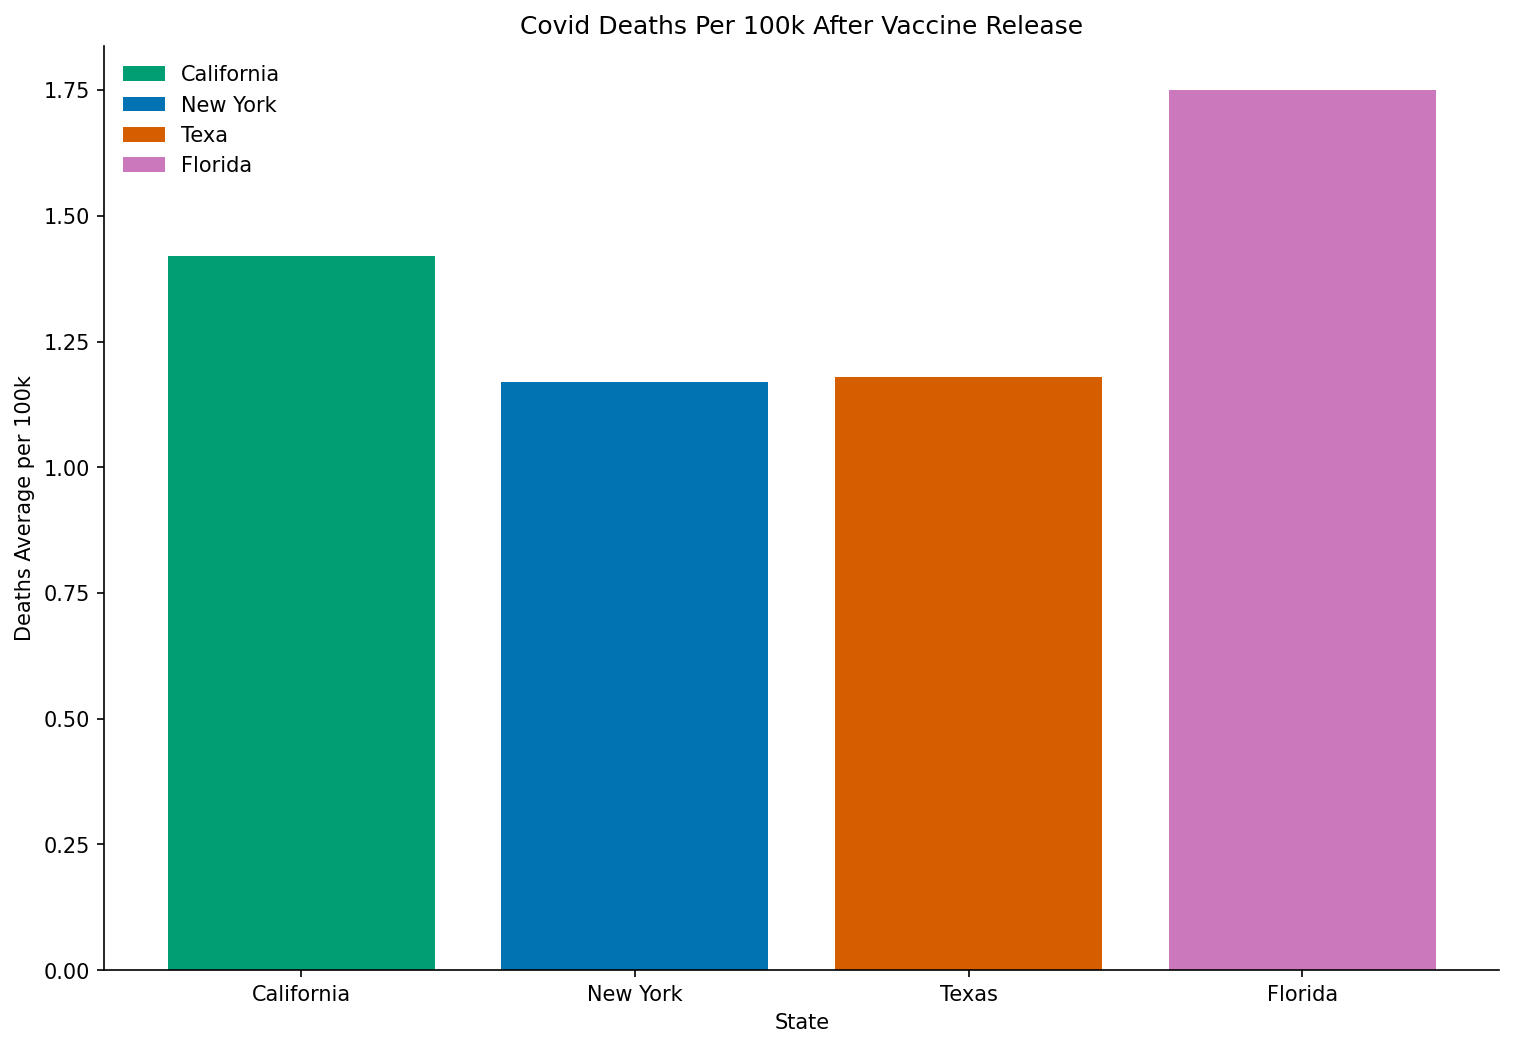

In [ ]:
fig, sub = plt.subplots(1, 1, figsize = (12, 8), dpi = 150, sharex=True)                                     # creates a bar plot to visualize the CA, NY, TX, FL data
                                                                                                              # 1 plot
                                                                                                              # the figure size is 12 by 8
                                                                                                              # 150 dots per inch
                                                                                                              # one x-axis
plt.bar(ca_aftervax['state'], ca_aftervax['deaths_avg_per_100k'], color=colors[2], label= "California")      # plots ca_aftervax
                                                                                                              # independent variable (x) is "state"
                                                                                                              # dependent variable (y) is "deaths_avg_per_100k"
                                                                                                              # the color is 2 from the seaborn palette colorblind
                                                                                                              # labeled as "California"
plt.bar(ny_aftervax['state'], ny_aftervax['deaths_avg_per_100k'], color=colors[0], label= "New York")        # plots ny_aftervax
                                                                                                              # independent variable (x) is "state"
                                                                                                              # dependent variable (y) is "deaths_avg_per_100k"
                                                                                                              # the color is 0 from the seaborn palette colorblind
                                                                                                              # labeled as "New York"
plt.bar(tx_aftervax['state'], tx_aftervax['deaths_avg_per_100k'], color=colors[3], label= "Texa")            # plots tx_aftervax
                                                                                                              # independent variable (x) is "state"
                                                                                                              # dependent variable (y) is "deaths_avg_per_100k"
                                                                                                              # the color is 3 from the seaborn palette colorblind
                                                                                                              # labeled as "Texas"
plt.bar(fl_aftervax['state'], fl_aftervax['deaths_avg_per_100k'], color=colors[4], label= "Florida")         # plots fl_aftervax
                                                                                                              # independent variable (x) is "state"
                                                                                                              # dependent variable (y) is "deaths_avg_per_100k"
                                                                                                              # the color is 4 from the seaborn palette colorblind
                                                                                                              # labeled as "Florida"
sub.set_ylabel('Deaths Average per 100k')                                                                    # adds label to y-axis
sub.set_xlabel('State')                                                                                      # adds label to x-axis
sub.set_title('Covid Deaths Per 100k After Vaccine Release')                                                 # adds title
sub.legend(frameon=False)                                                                                    # adds a legend
sb.despine()                                                                                                 # removes border around graph

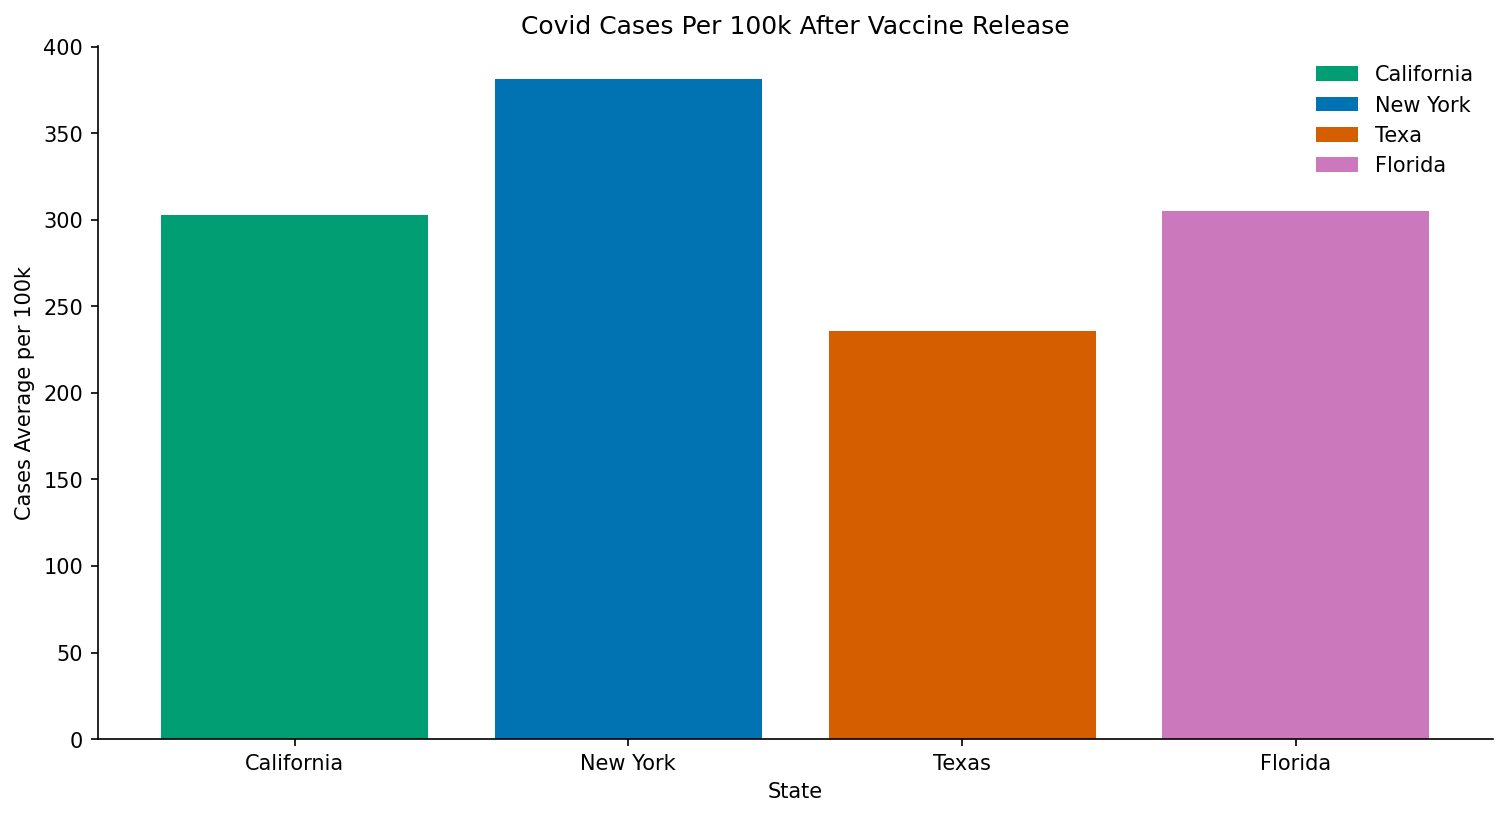

In [ ]:
fig, sub = plt.subplots(1, 1, figsize = (12, 6), dpi = 150, sharex=True)                                    # creates a bar plot to visualize the CA, NY, TX, FL data
                                                                                                              # 1 plot
                                                                                                              # the figure size is 12 by 6
                                                                                                              # 150 dots per inch
                                                                                                              # one x-axis
plt.bar(ca_aftervax['state'], ca_aftervax['cases_avg_per_100k'], color=colors[2], label= "California")      # plots ca_aftervax
                                                                                                              # independent variable (x) is "state"
                                                                                                              # dependent variable (y) is "case_avg_per_100k"
                                                                                                              # the color is 2 from the seaborn palette colorblind
                                                                                                              # labeled as "California"
plt.bar(ny_aftervax['state'], ny_aftervax['cases_avg_per_100k'], color=colors[0], label= "New York")        # plots ny_aftervax
                                                                                                              # independent variable (x) is "state"
                                                                                                              # dependent variable (y) is "cases_avg_per_100k"
                                                                                                              # the color is 0 from the seaborn palette colorblind
                                                                                                              # labeled as "New York"
plt.bar(tx_aftervax['state'], tx_aftervax['cases_avg_per_100k'], color=colors[3], label= "Texa")             # plots tx_aftervax
                                                                                                              # independent variable (x) is "state"
                                                                                                              # dependent variable (y) is "cases_avg_per_100k"
                                                                                                              # the color is 3 from the seaborn palette colorblind
                                                                                                              # labeled as "Texas"
plt.bar(fl_aftervax['state'], fl_aftervax['cases_avg_per_100k'], color=colors[4], label= "Florida")          # plots fl_aftervax
                                                                                                              # independent variable (x) is "state"
                                                                                                              # dependent variable (y) is "cases_avg_per_100k"
                                                                                                              # the color is 4 from the seaborn palette colorblind
                                                                                                              # labeled as "Florida"
sub.set_ylabel('Cases Average per 100k')                                                                     # adds label to y-axis
sub.set_xlabel('State')                                                                                      # adds label to x-axis
sub.set_title('Covid Cases Per 100k After Vaccine Release')                                                  # adds title
sub.legend(frameon=False)                                                                                    # adds a legend
sb.despine()                                                                                                 # removes border around graph

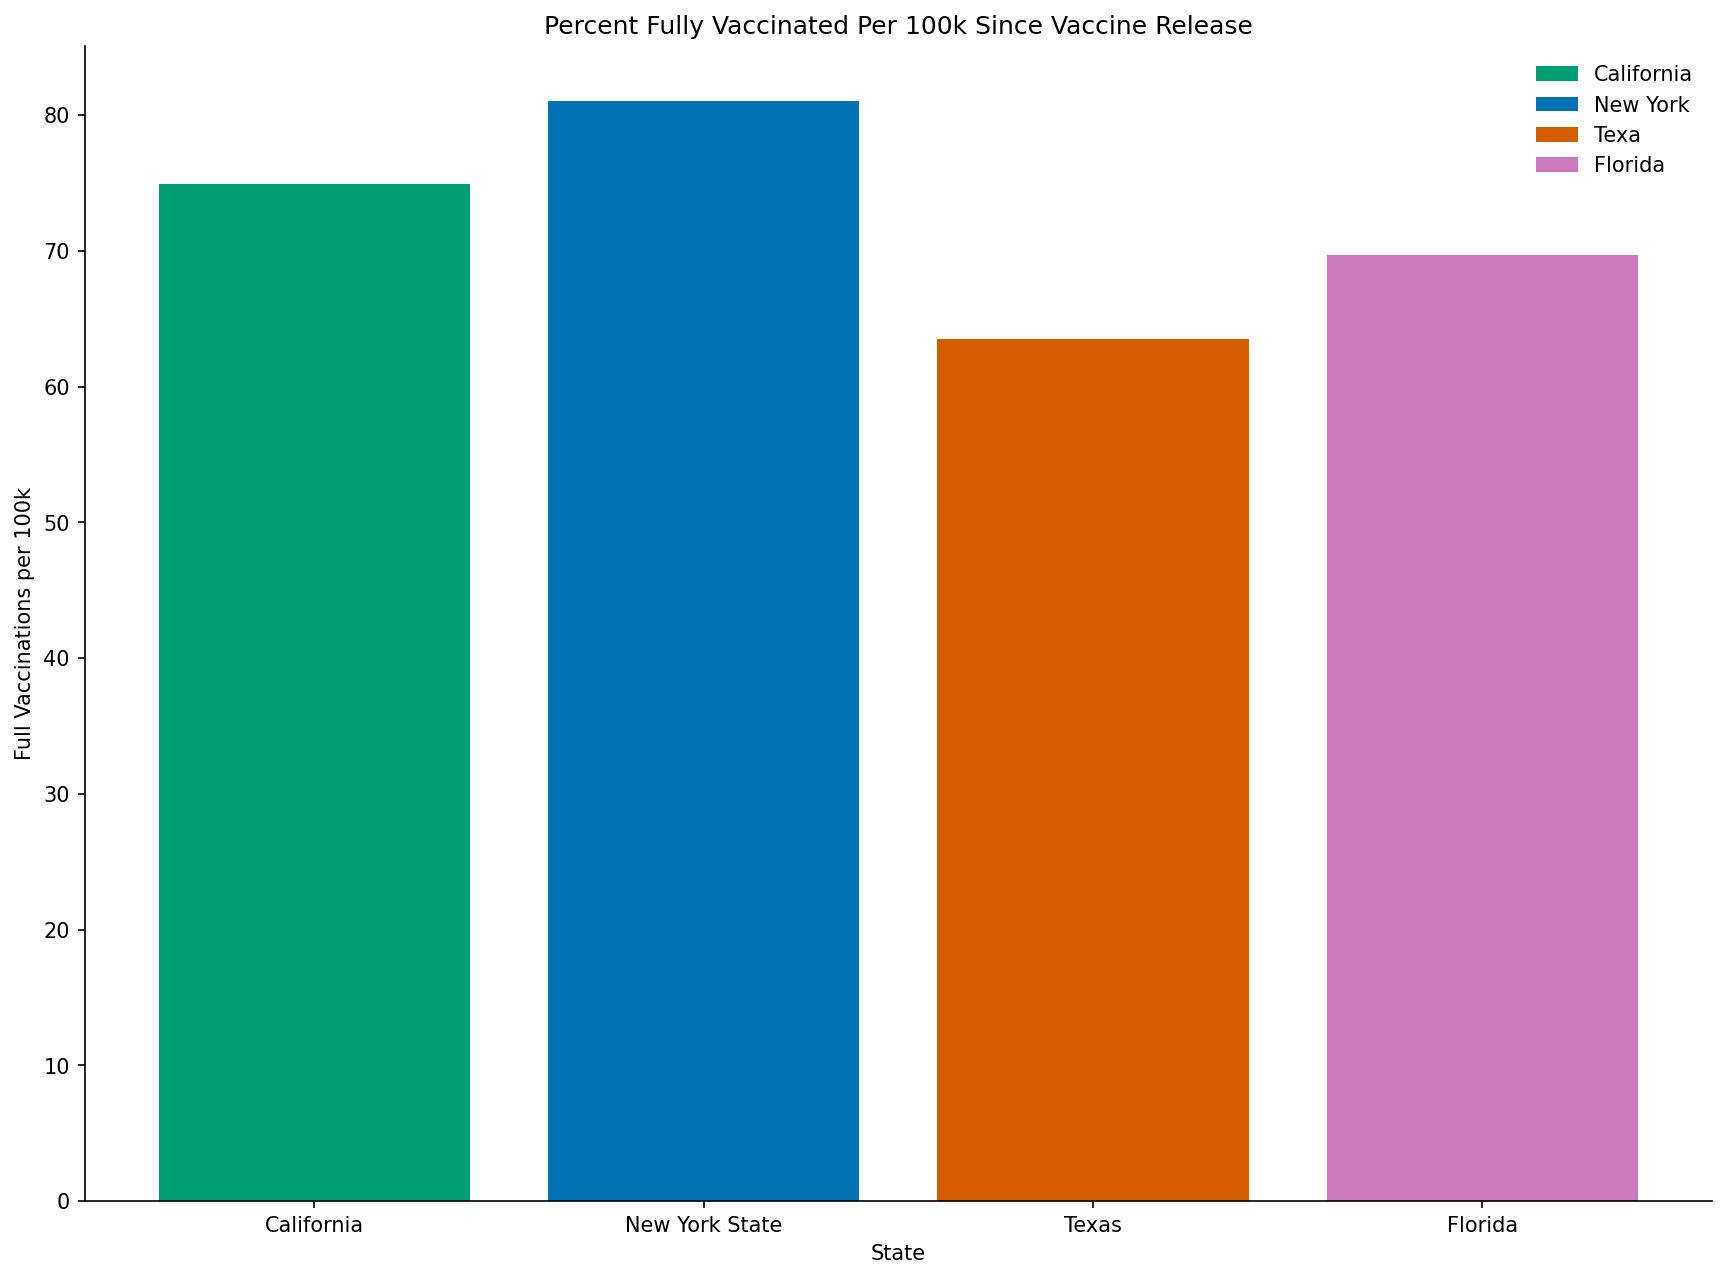

In [ ]:
fig, sub = plt.subplots(1, 1, figsize = (14, 10), dpi = 150, sharex=True)                                             # creates a bar plot to visualize the CA, NY, TX, FL data
                                                                                                                        # 1 plot
                                                                                                                        # the figure size is 14 by 10
                                                                                                                        # 150 dots per inch
                                                                                                                        # one x-axis

plt.bar(ca_vax['location'], ca_vax['people_fully_vaccinated_per_hundred'], color=colors[2], label= "California")      # plots ca_vax
                                                                                                                        # independent variable (x) is "state"
                                                                                                                        # dependent variable (y) is "people_fully_vaccinated_per_hundred"
                                                                                                                        # the color is 2 from the seaborn palette colorblind
                                                                                                                        # labeled as "California"
plt.bar(ny_vax['location'], ny_vax['people_fully_vaccinated_per_hundred'], color=colors[0], label= "New York")        # plots ny_vax
                                                                                                                        # independent variable (x) is "state"
                                                                                                                        # dependent variable (y) is "people_fully_vaccinated_per_hundred"
                                                                                                                        # the color is 0 from the seaborn palette colorblind
                                                                                                                        # labeled as "New York"
plt.bar(tx_vax['location'], tx_vax['people_fully_vaccinated_per_hundred'], color=colors[3], label= "Texa")            # plots tx_vax
                                                                                                                        # independent variable (x) is "state"
                                                                                                                        # dependent variable (y) is "people_fully_vaccinated_per_hundred"
                                                                                                                        # the color is 3 from the seaborn palette colorblind
                                                                                                                        # labeled as "Texas"
plt.bar(fl_vax['location'], fl_vax['people_fully_vaccinated_per_hundred'], color=colors[4], label= "Florida")         # plots fl_vax
                                                                                                                        # independent variable (x) is "state"
                                                                                                                        # dependent variable (y) is "people_fully_vaccinated_per_hundred"
                                                                                                                        # the color is 4 from the seaborn palette colorblind
                                                                                                                        # labeled as "Florida"
sub.set_ylabel('Full Vaccinations per 100k')                                                                          # adds label to y-axis
sub.set_xlabel('State')                                                                                               # adds label to x-axis
sub.set_title('Percent Fully Vaccinated Per 100k Since Vaccine Release')                                              # adds title
sub.legend(frameon=False)                                                                                             # adds a legend
sb.despine()                                                                                                           # removes border around graph



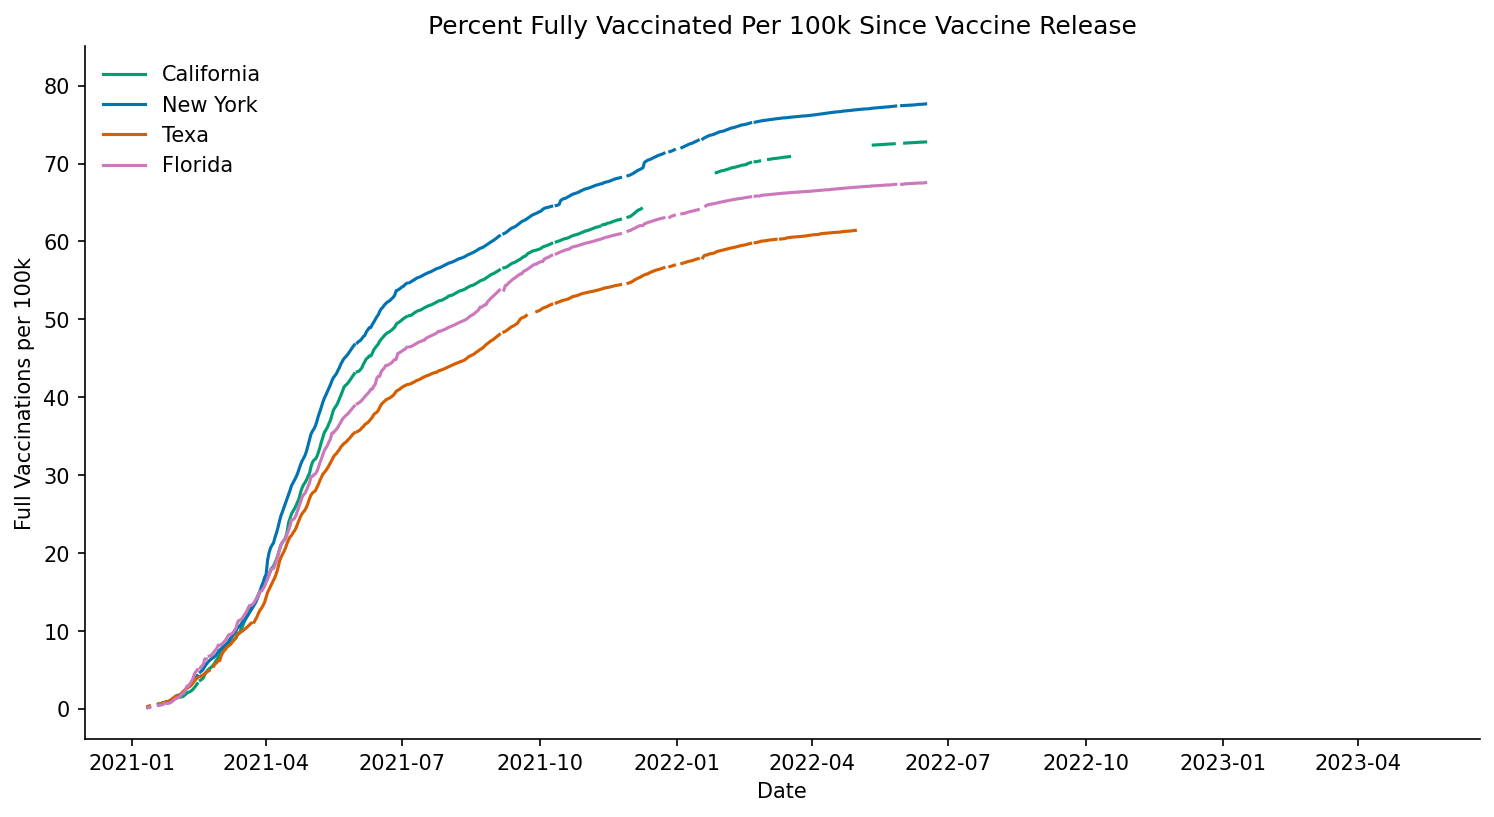

In [ ]:
fig, sub = plt.subplots(1, 1, figsize = (12, 6), dpi = 150, sharex=True)                                       # creates a plot to visualize the CA, NY, TX, FL data
                                                                                                                # 1 plot
                                                                                                                # the figure size is 12 by 6
                                                                                                                # 150 dots per inch
                                                                                                                # one x-axis
plt.plot(ca_vax['date'], ca_vax['people_fully_vaccinated_per_hundred'], color=colors[2], label= "California")   # plots ca_vax
                                                                                                                  # independent variable (x) is "date"
                                                                                                                  # dependent variable (y) is "people_fully_vaccinated_per_hundred"
                                                                                                                  # the color is 2 from the seaborn palette colorblind
                                                                                                                  # labeled as "California"
plt.plot(ny_vax['date'], ny_vax['people_fully_vaccinated_per_hundred'], color=colors[0], label= "New York")     # plots ny_vax
                                                                                                                  # independent variable (x) is "date"
                                                                                                                  # dependent variable (y) is "people_fully_vaccinated_per_hundred"
                                                                                                                  # the color is 0 from the seaborn palette colorblind
                                                                                                                  # labeled as "New York"
plt.plot(tx_vax['date'], tx_vax['people_fully_vaccinated_per_hundred'], color=colors[3], label= "Texa")         # plots tx_vax
                                                                                                                  # independent variable (x) is "date"
                                                                                                                  # dependent variable (y) is "people_fully_vaccinated_per_hundred"
                                                                                                                  # the color is 3 from the seaborn palette colorblind
                                                                                                                  # labeled as "Texas"
plt.plot(fl_vax['date'], fl_vax['people_fully_vaccinated_per_hundred'], color=colors[4], label= "Florida")      # plots fl_vax
                                                                                                                  # independent variable (x) is "date"
                                                                                                                  # dependent variable (y) is "people_fully_vaccinated_per_hundred"
                                                                                                                  # the color is 4 from the seaborn palette colorblind
                                                                                                                  # labeled as "Florida"
sub.set_ylabel('Full Vaccinations per 100k')                                                                    # adds label to y-axis
sub.set_xlabel('Date')                                                                                          # adds label to x-axis
sub.set_title('Percent Fully Vaccinated Per 100k Since Vaccine Release')                                        # adds title
sub.legend(frameon=False)                                                                                       # adds a legend
sb.despine()                                                                                                    # removes border around graph


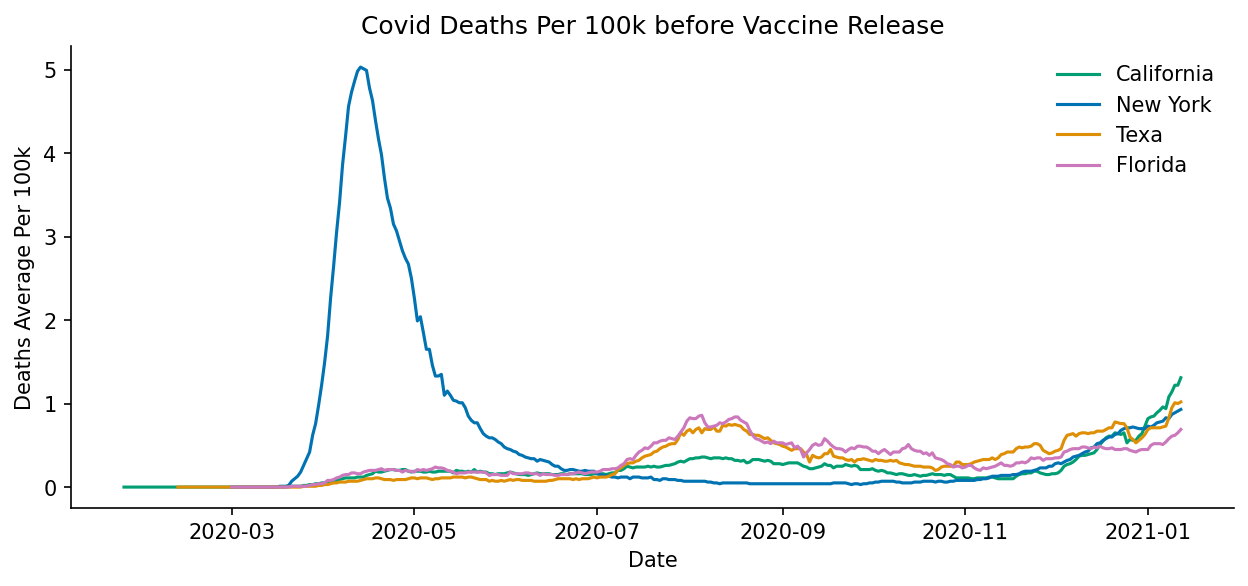

In [ ]:
fig, sub = plt.subplots(1, 1, figsize = (10, 4), dpi = 150, sharex=True)                                # creates a plot to visualize the CA, NY, TX, FL data
                                                                                                          # 1 plot
                                                                                                          # the figure size is 12 by 6
                                                                                                          # 150 dots per inch
                                                                                                          # one x-axis
plt.plot(ca_prevax['date'], ca_prevax['deaths_avg_per_100k'], color=colors[2], label= "California")   # plots ca_prevax
                                                                                                                  # independent variable (x) is "date"
                                                                                                                  # dependent variable (y) is "deaths_avg_per_100k"
                                                                                                                  # the color is 2 from the seaborn palette colorblind
                                                                                                                  # labeled as "California"
plt.plot(ny_prevax['date'], ny_prevax['deaths_avg_per_100k'], color=colors[0], label= "New York")     # plots ny_prevax
                                                                                                                  # independent variable (x) is "date"
                                                                                                                  # dependent variable (y) is "deaths_avg_per_100k"
                                                                                                                  # the color is 0 from the seaborn palette colorblind
                                                                                                                  # labeled as "New York"
plt.plot(tx_prevax['date'], tx_prevax['deaths_avg_per_100k'], color=colors[1], label= "Texa")         # plots tx_prevax
                                                                                                                  # independent variable (x) is "date"
                                                                                                                  # dependent variable (y) is "deaths_avg_per_100k"
                                                                                                                  # the color is 3 from the seaborn palette colorblind
                                                                                                                  # labeled as "Texas"
plt.plot(fl_prevax['date'], fl_prevax['deaths_avg_per_100k'], color=colors[4], label= "Florida")      # plots fl_vpreax
                                                                                                                  # independent variable (x) is "date"
                                                                                                                  # dependent variable (y) is "deaths_avg_per_100k"
                                                                                                                  # the color is 4 from the seaborn palette colorblind
                                                                                                                  # labeled as "Florida"
sub.set_ylabel('Deaths Average Per 100k')                                                             # adds label to y-axis
sub.set_xlabel('Date')                                                                                # adds label to x-axis
sub.set_title('Covid Deaths Per 100k before Vaccine Release')                                         # adds title
sub.legend(frameon=False)                                                                             # adds a legend
sb.despine()                                                                                          # removes border around graph



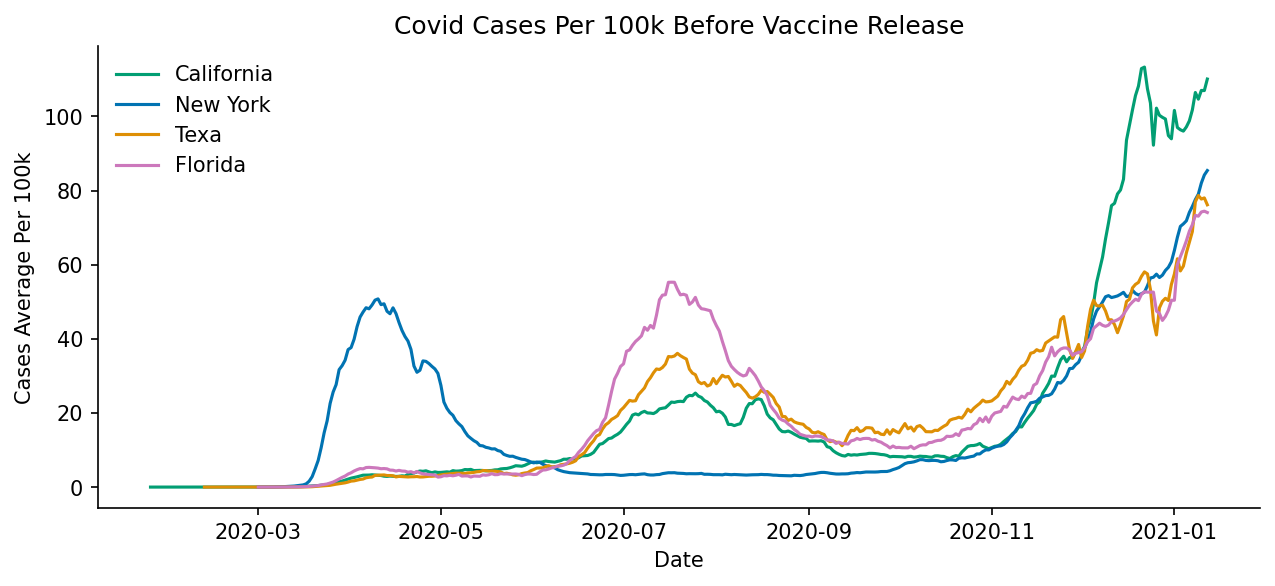

In [ ]:
fig, sub = plt.subplots(1, 1, figsize = (10, 4), dpi = 150, sharex=True)                             # creates a plot to visualize the CA, NY, TX, FL data
                                                                                                          # 1 plot
                                                                                                          # the figure size is 12 by 6
                                                                                                          # 150 dots per inch
                                                                                                          # one x-axis
plt.plot(ca_prevax['date'], ca_prevax['cases_avg_per_100k'], color=colors[2], label= "California")   # plots ca_prevax
                                                                                                                  # independent variable (x) is "date"
                                                                                                                  # dependent variable (y) is "cases_avg_per_100k"
                                                                                                                  # the color is 2 from the seaborn palette colorblind
                                                                                                                  # labeled as "California"
plt.plot(ny_prevax['date'], ny_prevax['cases_avg_per_100k'], color=colors[0], label= "New York")     # plots ny_prevax
                                                                                                                  # independent variable (x) is "date"
                                                                                                                  # dependent variable (y) is "cases_avg_per_100k"
                                                                                                                  # the color is 0 from the seaborn palette colorblind
                                                                                                                  # labeled as "New York"
plt.plot(tx_prevax['date'], tx_prevax['cases_avg_per_100k'], color=colors[1], label= "Texa")         # plots tx_prevax
                                                                                                                  # independent variable (x) is "date"
                                                                                                                  # dependent variable (y) is "cases_avg_per_100k"
                                                                                                                  # the color is 3 from the seaborn palette colorblind
                                                                                                                  # labeled as "Texas"
plt.plot(fl_prevax['date'], fl_prevax['cases_avg_per_100k'], color=colors[4], label= "Florida")      # plots fl_vpreax
                                                                                                                  # independent variable (x) is "date"
                                                                                                                  # dependent variable (y) is "cases_avg_per_100k"
                                                                                                                  # the color is 4 from the seaborn palette colorblind
                                                                                                                  # labeled as "Florida"
sub.set_ylabel('Cases Average Per 100k')                                                             # adds label to y-axis
sub.set_xlabel('Date')                                                                               # adds label to x-axis
sub.set_title('Covid Cases Per 100k Before Vaccine Release')                                         # adds title
sub.legend(frameon=False)                                                                            # adds a legend
sb.despine()                                                                                         # removes border around graph



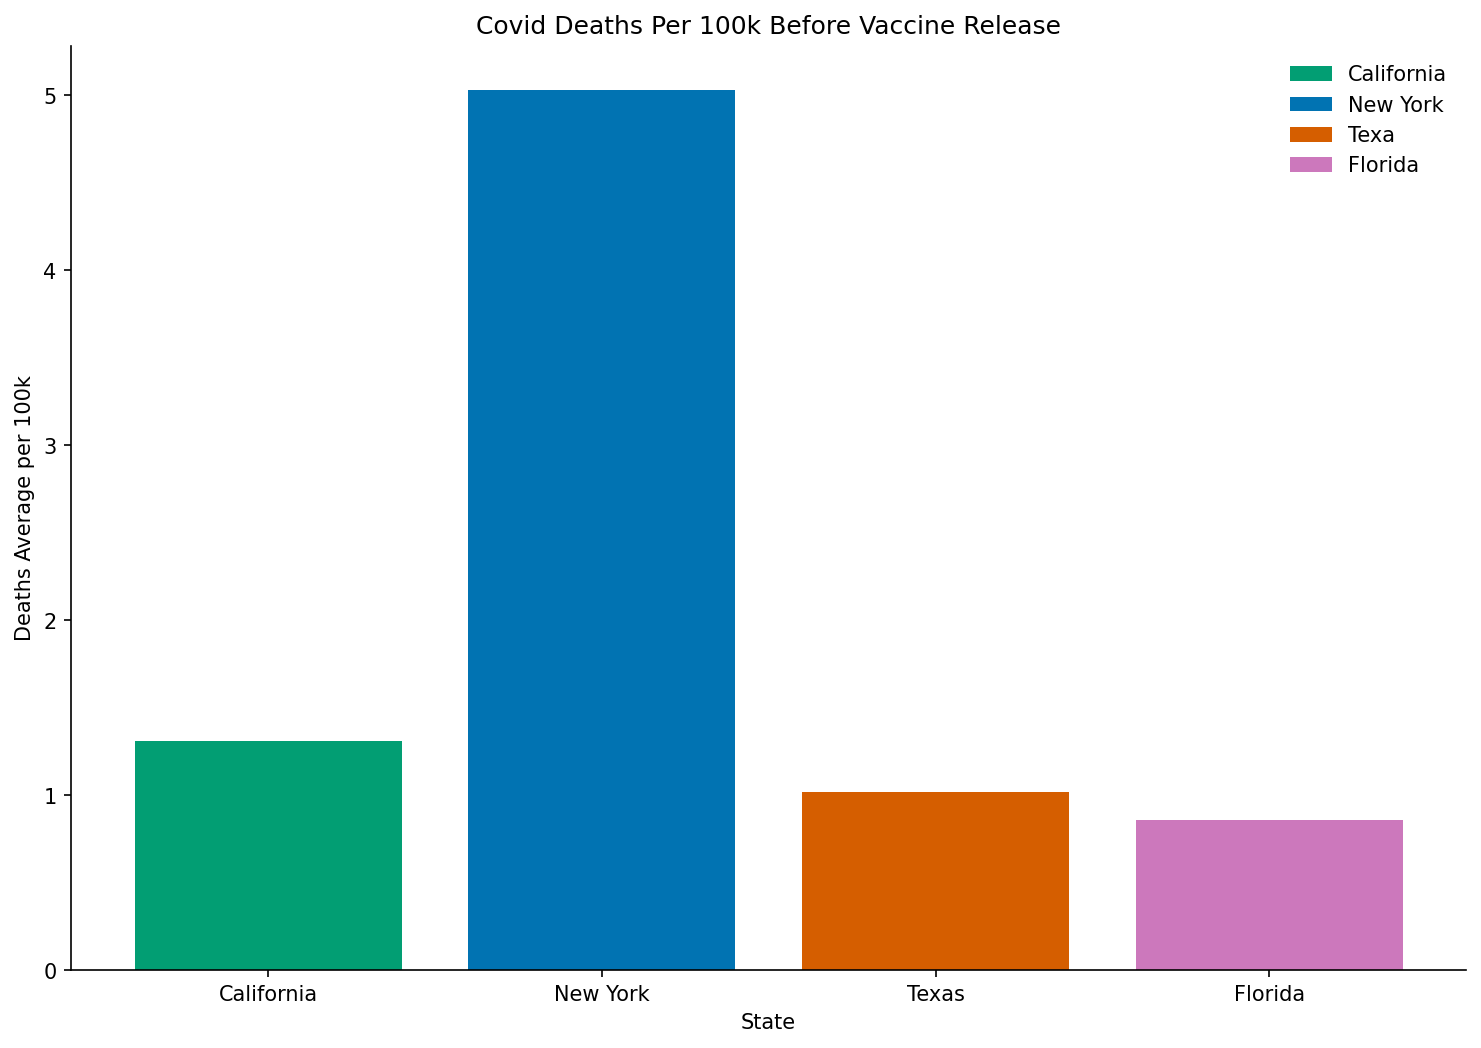

In [ ]:
fig, sub = plt.subplots(1, 1, figsize = (12, 8), dpi = 150, sharex=True)                               # creates a bar plot to visualize the CA, NY, TX, FL data
                                                                                                         # 1 plot
                                                                                                         # the figure size is 12 by 6
                                                                                                         # 150 dots per inch
                                                                                                         # one x-axis
plt.bar(ca_prevax['state'], ca_prevax['deaths_avg_per_100k'], color=colors[2], label= "California")   # plots ca_prevax
                                                                                                                  # independent variable (x) is "state"
                                                                                                                  # dependent variable (y) is "deaths_avg_per_100k"
                                                                                                                  # the color is 2 from the seaborn palette colorblind
                                                                                                                  # labeled as "California"
plt.bar(ny_prevax['state'], ny_prevax['deaths_avg_per_100k'], color=colors[0], label= "New York")     # plots ny_prevax
                                                                                                                  # independent variable (x) is "state"
                                                                                                                  # dependent variable (y) is "deaths_avg_per_100k"
                                                                                                                  # the color is 0 from the seaborn palette colorblind
                                                                                                                  # labeled as "New York"
plt.bar(tx_prevax['state'], tx_prevax['deaths_avg_per_100k'], color=colors[3], label= "Texa")         # plots tx_prevax
                                                                                                                  # independent variable (x) is "state"
                                                                                                                  # dependent variable (y) is "deaths_avg_per_100k"
                                                                                                                  # the color is 3 from the seaborn palette colorblind
                                                                                                                  # labeled as "Texas"
plt.bar(fl_prevax['state'], fl_prevax['deaths_avg_per_100k'], color=colors[4], label= "Florida")      # plots fl_vpreax
                                                                                                                  # independent variable (x) is "state"
                                                                                                                  # dependent variable (y) is "deaths_avg_per_100k"
                                                                                                                  # the color is 4 from the seaborn palette colorblind
                                                                                                                  # labeled as "Florida"
sub.set_ylabel('Deaths Average per 100k')                                                             # adds label to y-axis
sub.set_xlabel('State')                                                                               # adds label to x-axis
sub.set_title('Covid Deaths Per 100k Before Vaccine Release')                                         # adds title
sub.legend(frameon=False)                                                                             # adds a legend
sb.despine()                                                                                          # removes border around graph



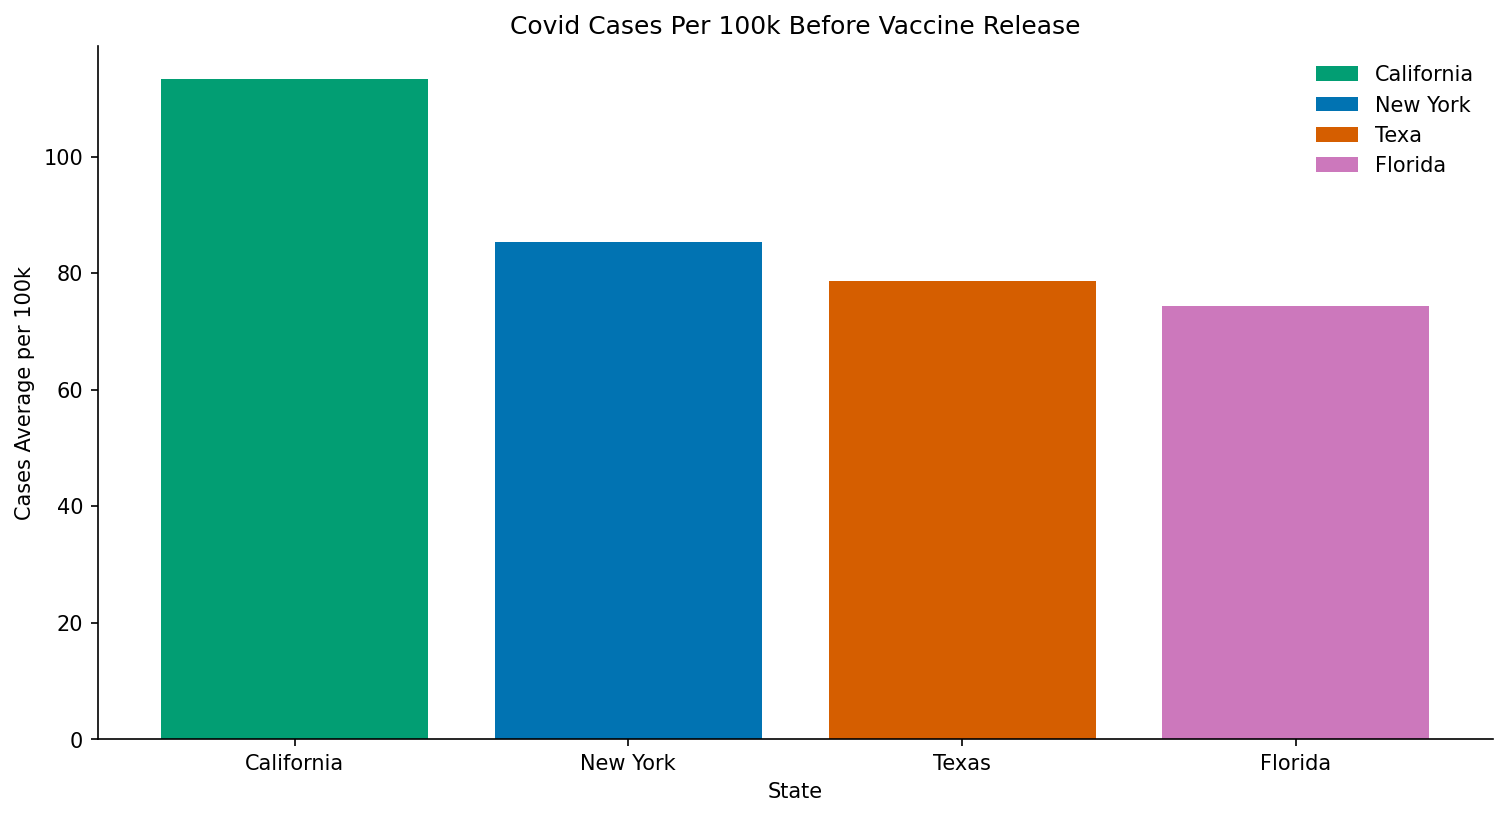

In [ ]:
fig, sub = plt.subplots(1, 1, figsize = (12, 6), dpi = 150, sharex=True)                              # creates a bar plot to visualize the CA, NY, TX, FL data
                                                                                                          # 1 plot
                                                                                                          # the figure size is 12 by 6
                                                                                                          # 150 dots per inch
                                                                                                          # one x-axis
plt.bar(ca_prevax['state'], ca_prevax['cases_avg_per_100k'], color=colors[2], label= "California")   # plots ca_prevax
                                                                                                                  # independent variable (x) is "state"
                                                                                                                  # dependent variable (y) is "cases_avg_per_100k"
                                                                                                                  # the color is 2 from the seaborn palette colorblind
                                                                                                                  # labeled as "California"
plt.bar(ny_prevax['state'], ny_prevax['cases_avg_per_100k'], color=colors[0], label= "New York")     # plots ny_prevax
                                                                                                                  # independent variable (x) is "state"
                                                                                                                  # dependent variable (y) is "cases_avg_per_100k"
                                                                                                                  # the color is 0 from the seaborn palette colorblind
                                                                                                                  # labeled as "New York"
plt.bar(tx_prevax['state'], tx_prevax['cases_avg_per_100k'], color=colors[3], label= "Texa")         # plots tx_prevax
                                                                                                                  # independent variable (x) is "state"
                                                                                                                  # dependent variable (y) is "cases_avg_per_100k"
                                                                                                                  # the color is 3 from the seaborn palette colorblind
                                                                                                                  # labeled as "Texas"
plt.bar(fl_prevax['state'], fl_prevax['cases_avg_per_100k'], color=colors[4], label= "Florida")      # plots fl_vpreax
                                                                                                                  # independent variable (x) is "state"
                                                                                                                  # dependent variable (y) is "cases_avg_per_100k"
                                                                                                                  # the color is 4 from the seaborn palette colorblind
                                                                                                                  # labeled as "Florida"
sub.set_ylabel('Cases Average per 100k')                                                             # adds label to y-axis
sub.set_xlabel('State')                                                                              # adds label to x-axis
sub.set_title('Covid Cases Per 100k Before Vaccine Release')                                         # adds title
sub.legend(frameon=False)                                                                            # adds a legend
sb.despine()                                                                                         # removes border around graph


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fd6e2914-bf06-44d9-8520-39d43341e145' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>